In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
sns.set_theme(style='darkgrid', palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#importing dataset
df = pd.read_csv(r"C:\Users\shubh\Downloads\TCS.NS (3).csv",index_col=0, parse_dates=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-08-12,38.724998,40.000000,38.724998,39.700001,28.128599,212976.0
2002-08-13,39.750000,40.387501,38.875000,39.162498,27.747763,153576.0
2002-08-14,39.250000,39.250000,35.724998,36.462502,25.834743,822776.0
2002-08-15,36.462502,36.462502,36.462502,36.462502,25.834743,0.0
2002-08-16,36.275002,38.000000,35.750000,36.375000,25.772743,811856.0
...,...,...,...,...,...,...
2024-01-01,3790.000000,3832.000000,3773.000000,3811.100098,3811.100098,825907.0
2024-01-02,3811.100098,3811.100098,3767.250000,3783.199951,3783.199951,1344068.0
2024-01-03,3767.000000,3771.850098,3687.050049,3691.750000,3691.750000,1803075.0


In [3]:
#Checking null values
df.isna().sum()

Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64

In [4]:
df[df['Close'].isnull()]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-13,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-06,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2012-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-08,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN
2014-03-22,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Filling null values
df = df.interpolate()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-08-12,38.724998,40.000000,38.724998,39.700001,28.128599,212976.0
2002-08-13,39.750000,40.387501,38.875000,39.162498,27.747763,153576.0
2002-08-14,39.250000,39.250000,35.724998,36.462502,25.834743,822776.0
2002-08-15,36.462502,36.462502,36.462502,36.462502,25.834743,0.0
2002-08-16,36.275002,38.000000,35.750000,36.375000,25.772743,811856.0
...,...,...,...,...,...,...
2024-01-01,3790.000000,3832.000000,3773.000000,3811.100098,3811.100098,825907.0
2024-01-02,3811.100098,3811.100098,3767.250000,3783.199951,3783.199951,1344068.0
2024-01-03,3767.000000,3771.850098,3687.050049,3691.750000,3691.750000,1803075.0


In [6]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
# Checking outliers
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5325.000000,5325.000000,5325.000000,5325.000000,5325.000000,5.325000e+03
mean,1160.040914,1171.962769,1147.238561,1159.525752,1046.482905,3.204312e+06
std,1110.589395,1120.042598,1100.309483,1110.207044,1084.870232,3.150323e+06
min,32.474998,36.450001,32.474998,35.474998,25.135057,0.000000e+00
25%,237.274994,241.500000,231.662506,236.544998,171.470764,1.644742e+06
50%,726.849976,734.500000,720.349976,726.400024,582.971558,2.503466e+06
75%,1850.000000,1871.000000,1821.000000,1843.650024,1674.508423,3.964578e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3861.000000,8.806715e+07


<Axes: >

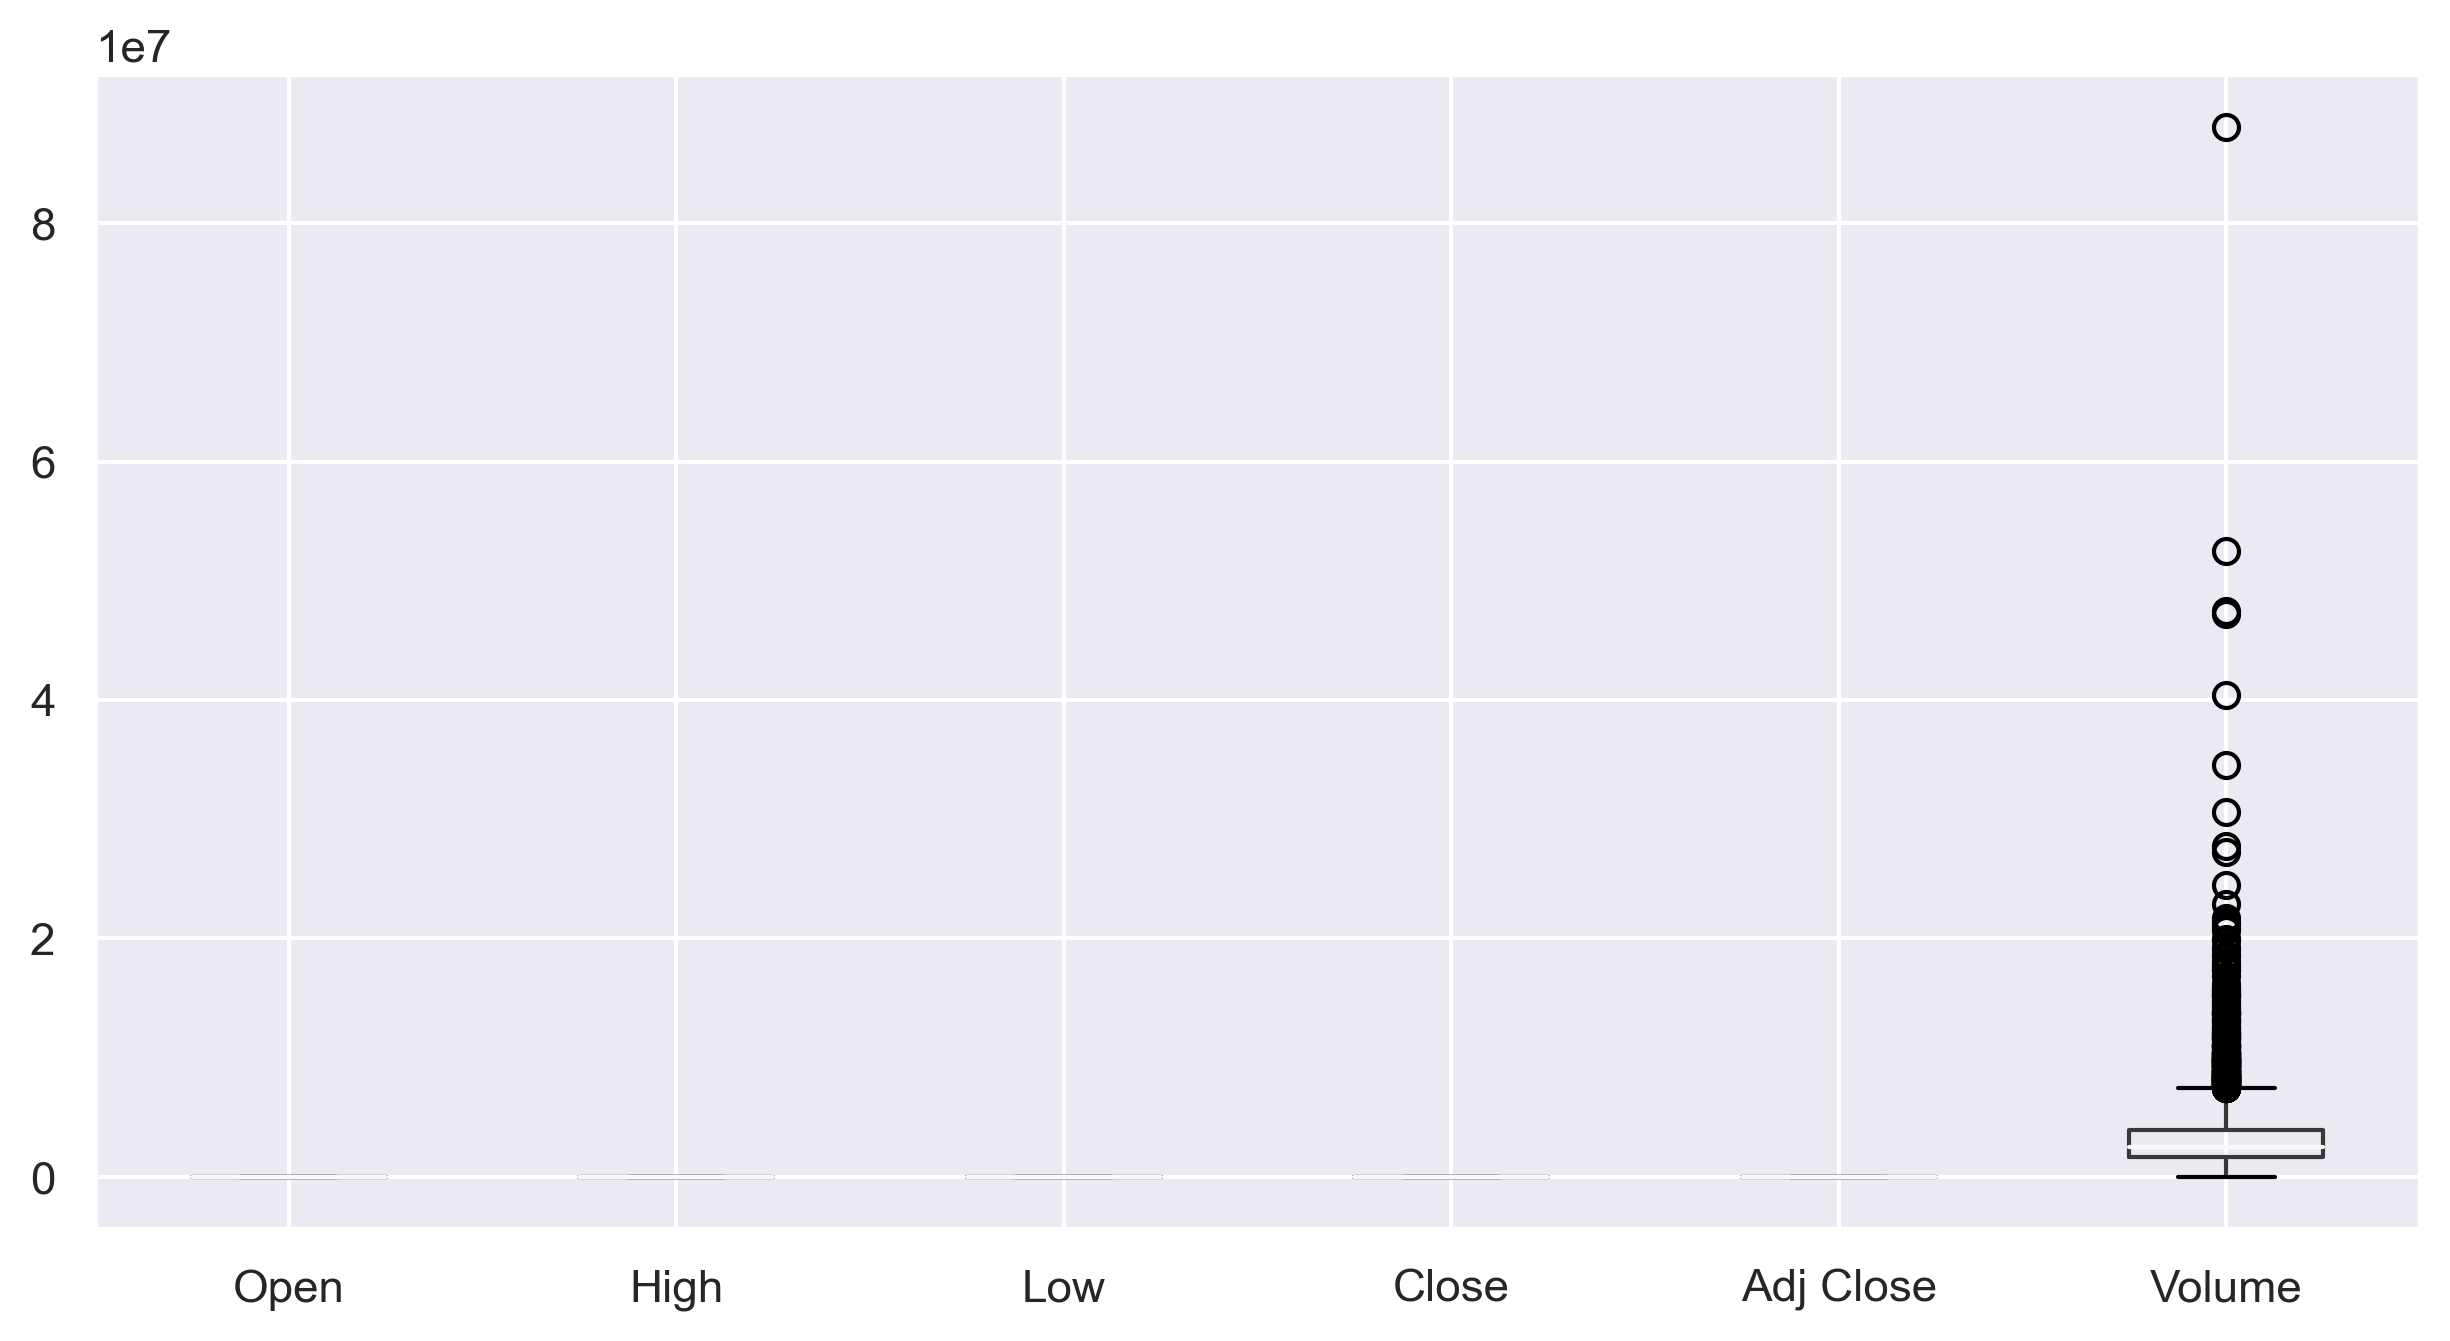

In [8]:
df.boxplot()

In [9]:
# For removing outliers using IQR Method
def outlier_detection(df,Volume):
    q1=df[Volume].quantile(0.25)
    q3=df[Volume].quantile(0.75)
    iqr=q3-q1
    
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    
    return lower,upper

In [10]:
outlier_detection(df,'Volume')

(-1835012.0, 7444332.0)

In [11]:
df.loc[df['Volume']>7444332.0,'Volume']
df.loc[df['Volume']>7444332.0,'Volume']=7444332.0

<Axes: >

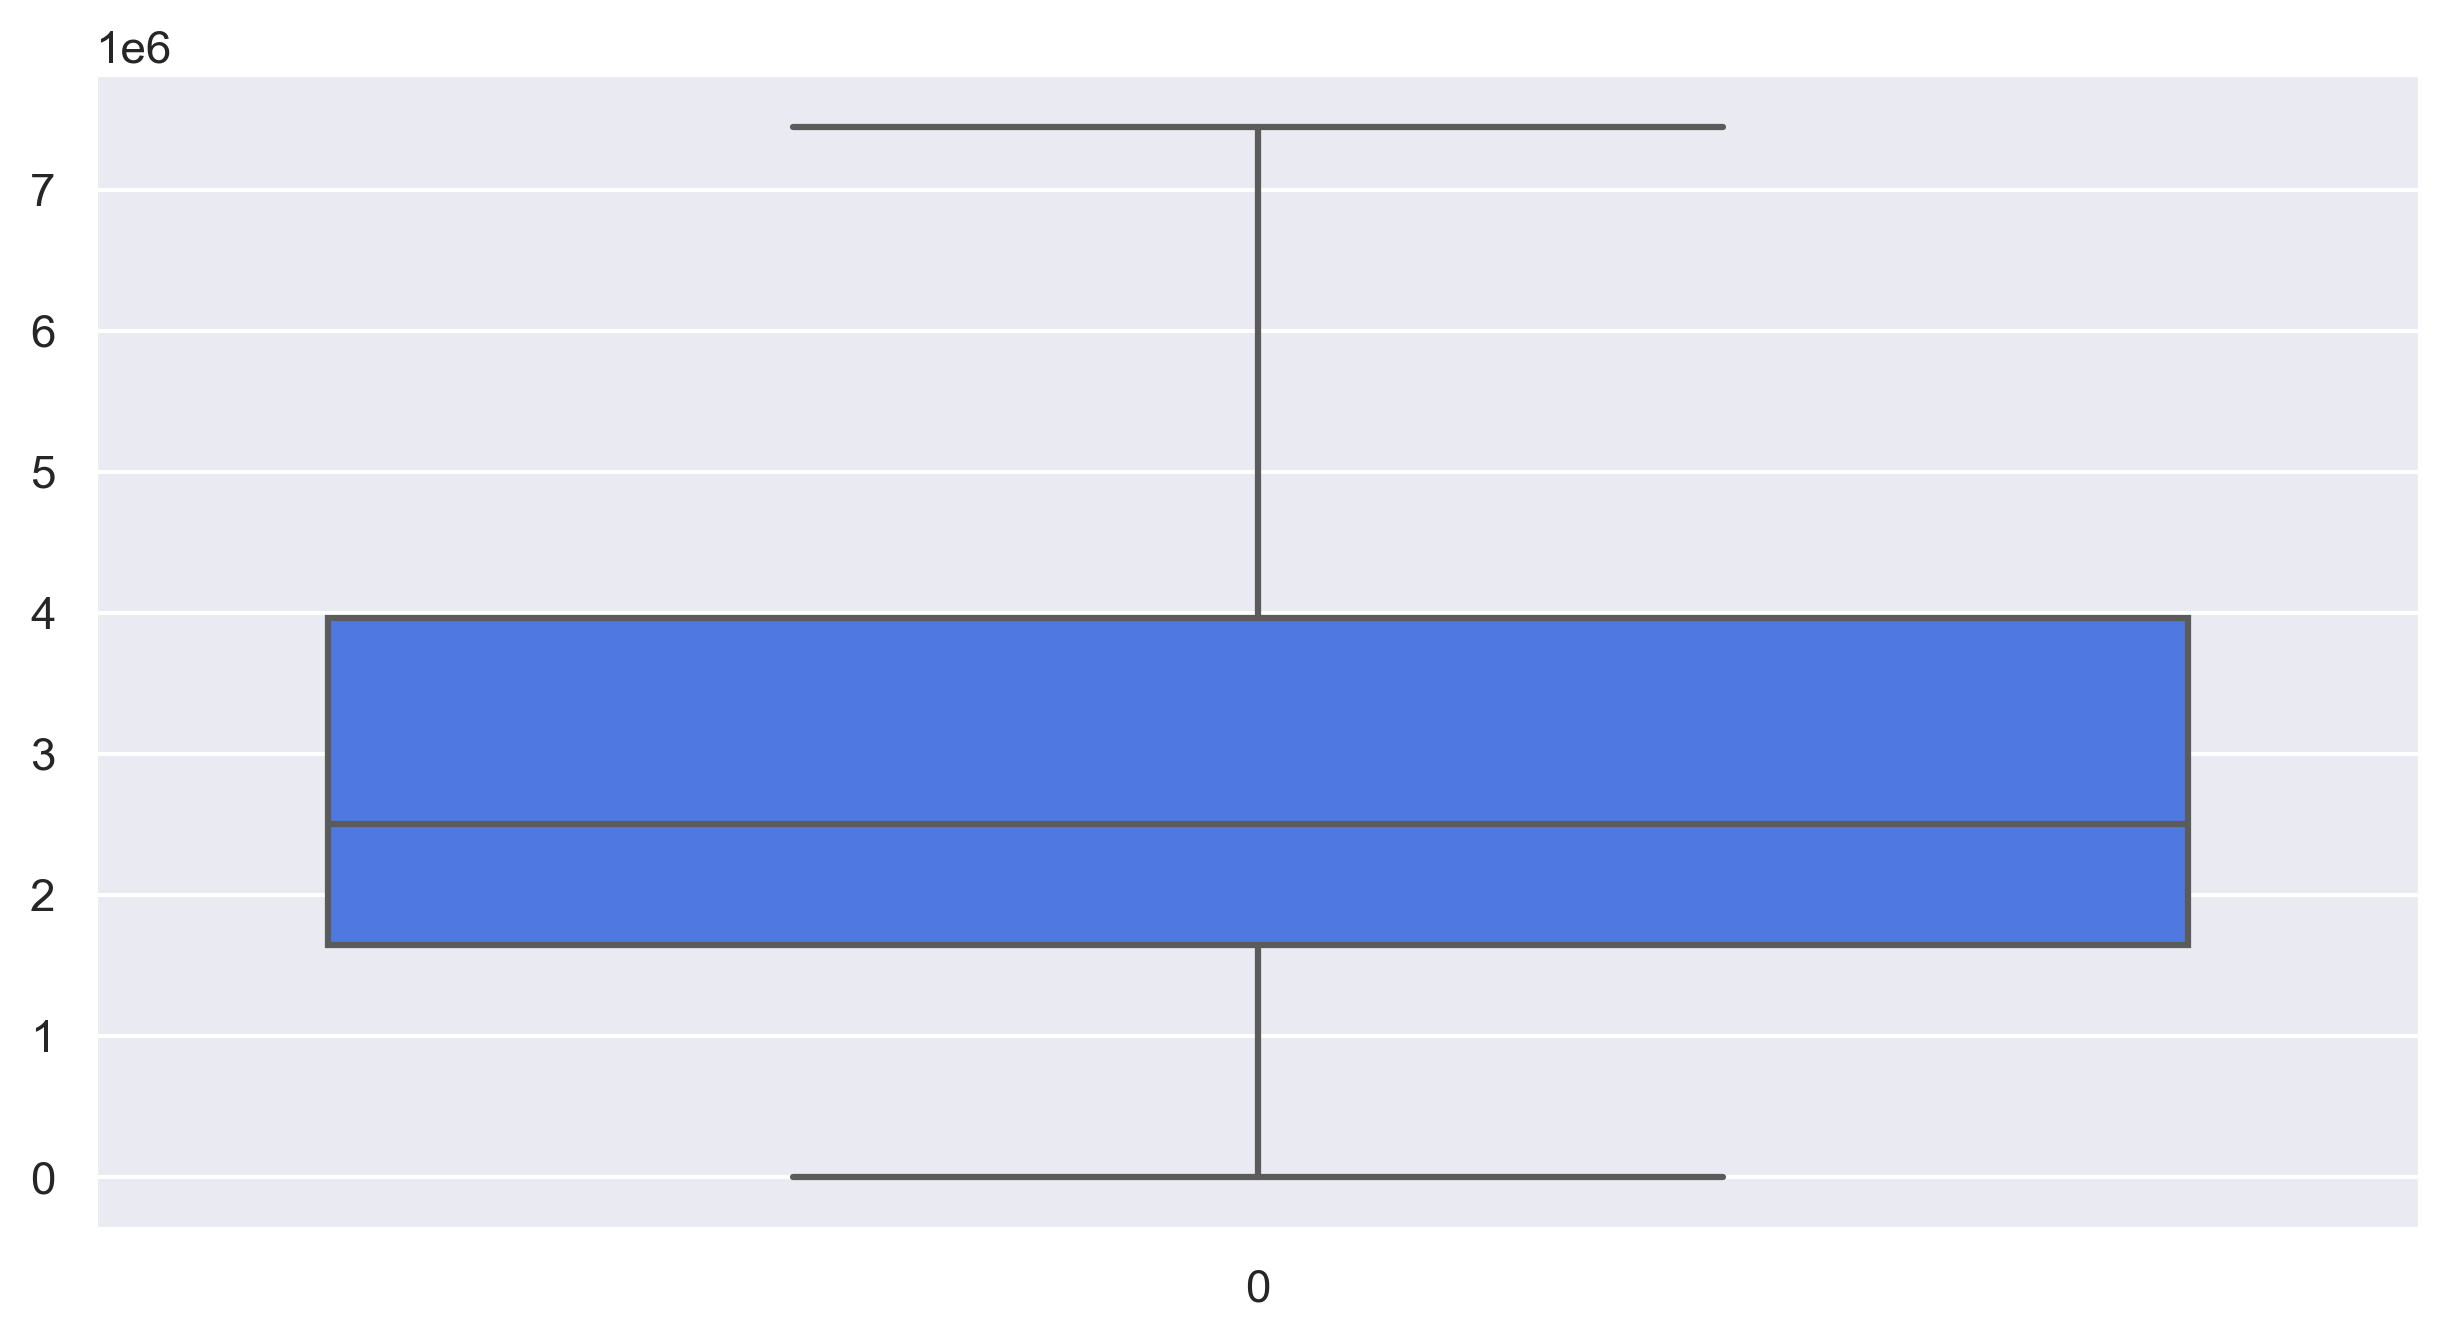

In [12]:
sns.boxplot(df['Volume'])

In [13]:
# Checking skewness
df.skew()

Open         0.980127
High         0.977194
Low          0.982676
Close        0.980164
Adj Close    1.099993
Volume       0.773969
dtype: float64

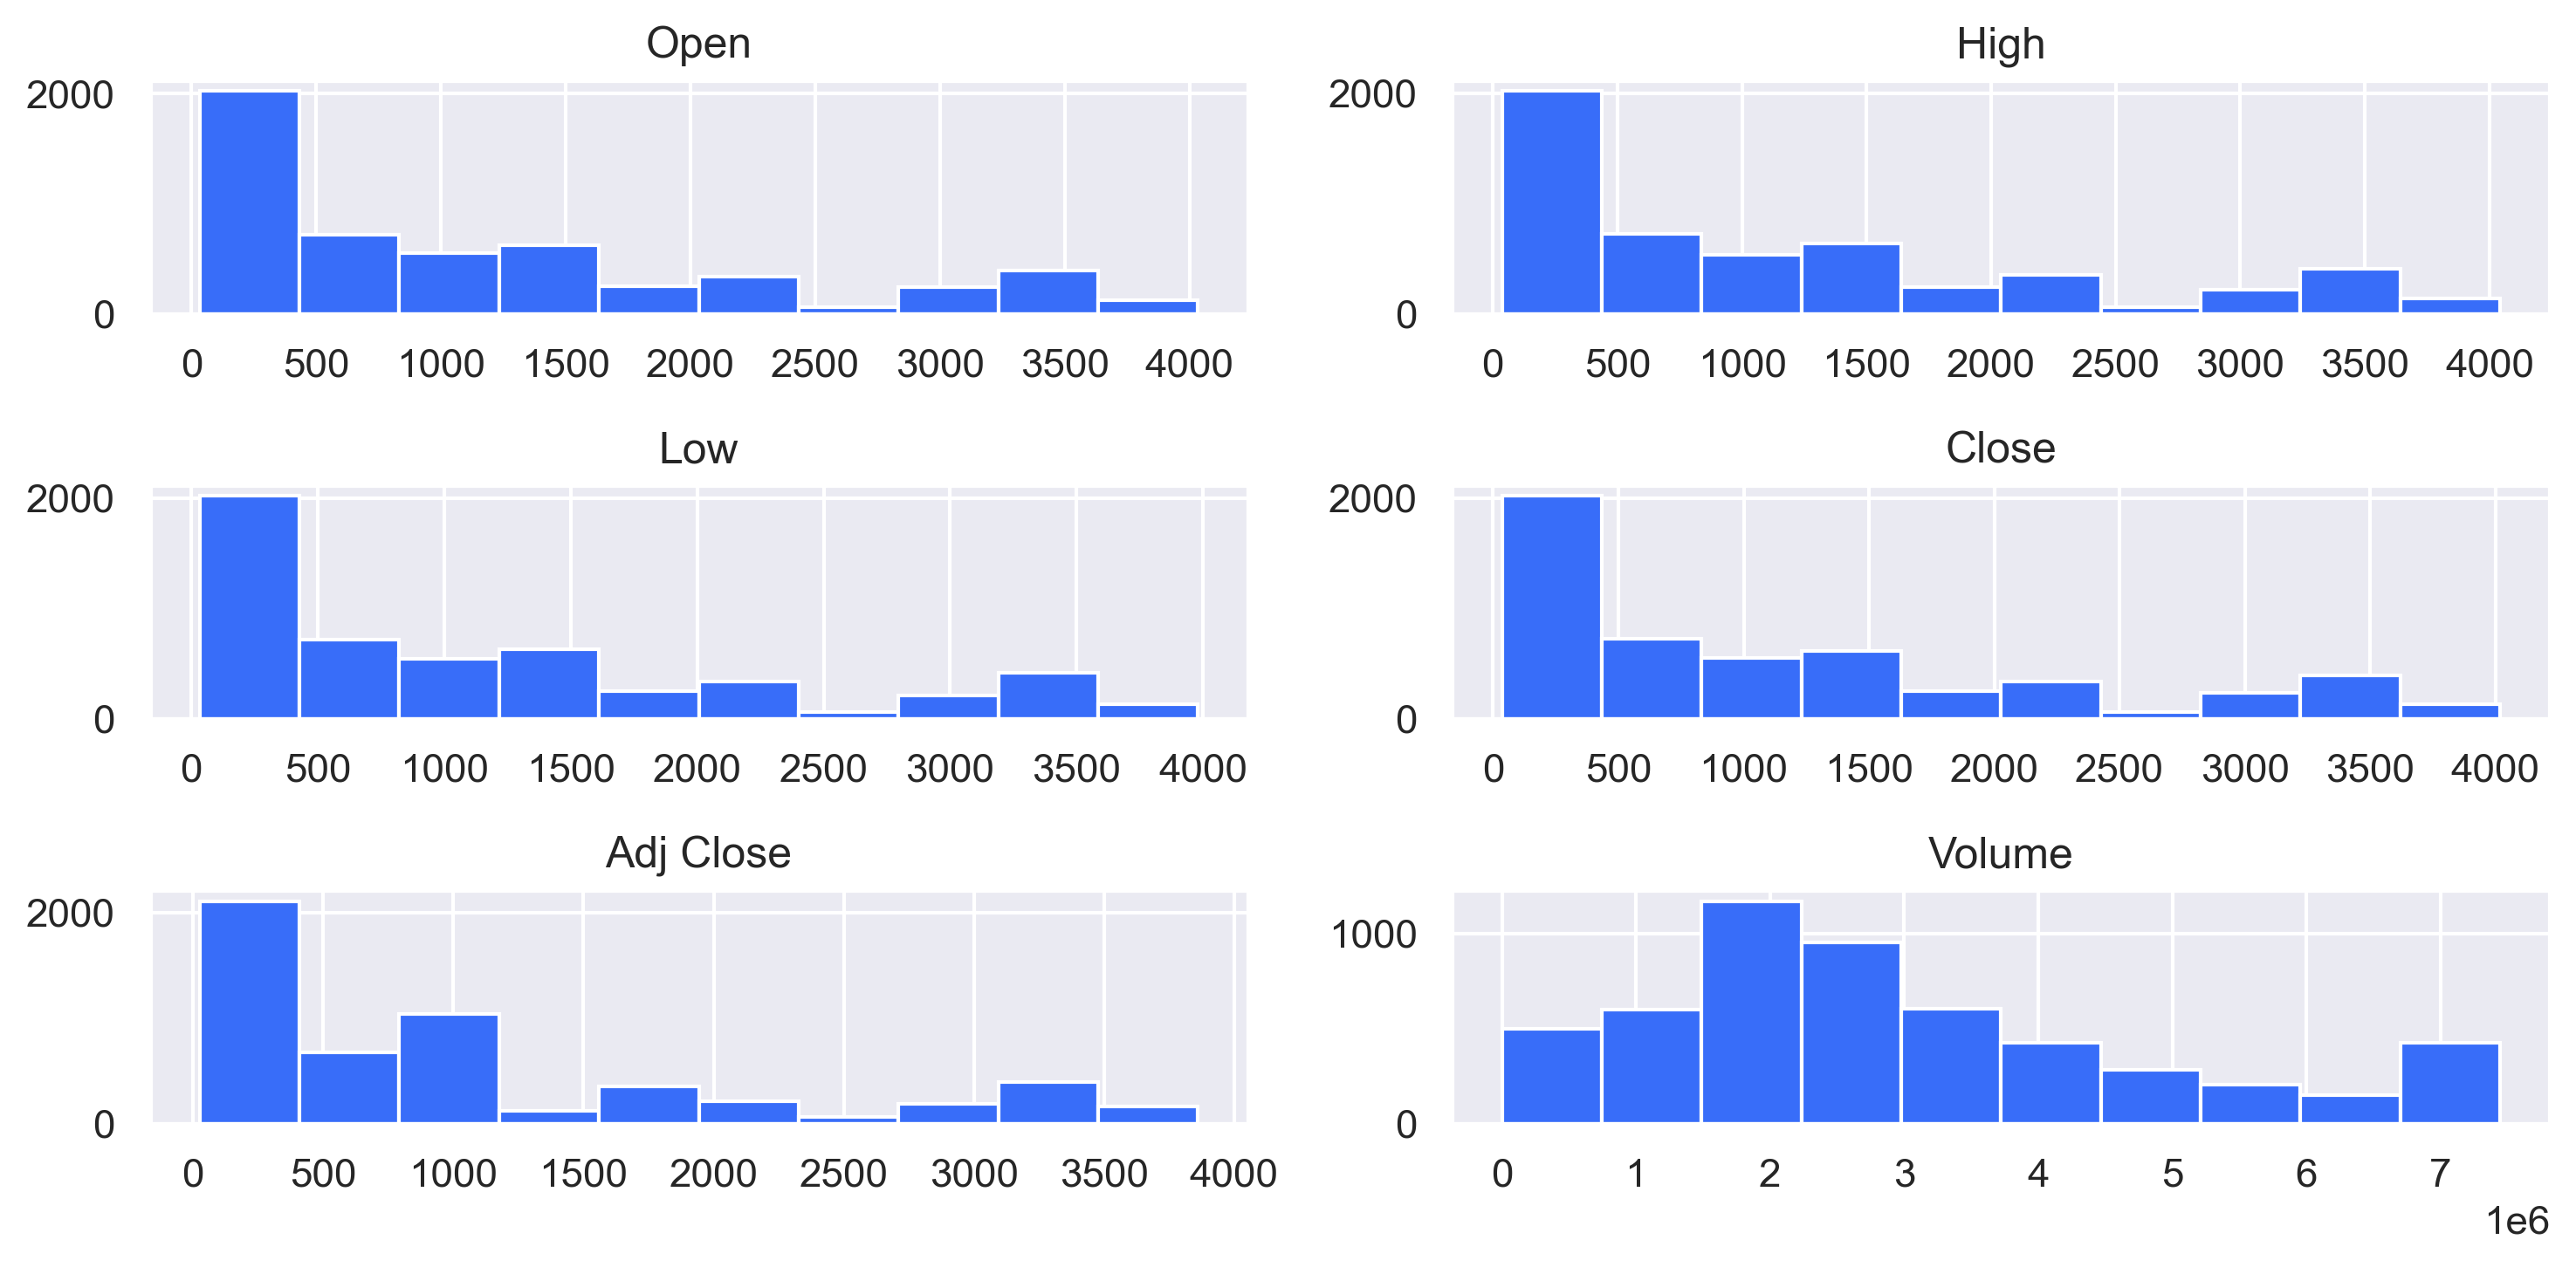

In [14]:
# Ploting Histogram
df.hist()
plt.tight_layout()

In [15]:
# Log Transformation for skewness
df['log_Open']=np.log(df['Open'])
df['log_High']=np.log(df['High'])
df['log_Low']=np.log(df['Low'])
df['log_Close']=np.log(df['Close'])
df['log_Adj Close']=np.log(df['Adj Close'])
#df['log_Volume']=np.log(df['Volume'])
df['Open_Squared'] = df['Open'] ** 2
df

,Open,High,Low,Close,Adj Close,Volume,log_Open,log_High,log_Low,log_Close,log_Adj Close,Open_Squared
Date,,,,,,,,,,,,
2002-08-12,38.724998,40.000000,38.724998,39.700001,28.128599,212976.0,3.656485,3.688879,3.656485,3.681351,3.336787,1.499625e+03
2002-08-13,39.750000,40.387501,38.875000,39.162498,27.747763,153576.0,3.682610,3.698520,3.660351,3.667720,3.323155,1.580062e+03
2002-08-14,39.250000,39.250000,35.724998,36.462502,25.834743,822776.0,3.669951,3.669951,3.575851,3.596284,3.251720,1.540562e+03
2002-08-15,36.462502,36.462502,36.462502,36.462502,25.834743,0.0,3.596284,3.596284,3.596284,3.596284,3.251720,1.329514e+03
2002-08-16,36.275002,38.000000,35.750000,36.375000,25.772743,811856.0,3.591129,3.637586,3.576550,3.593882,3.249317,1.315876e+03
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-01,3790.000000,3832.000000,3773.000000,3811.100098,3811.100098,825907.0,8.240121,8.251142,8.235626,8.245673,8.245673,1.436410e+07
2024-01-02,3811.100098,3811.100098,3767.250000,3783.199951,3783.199951,1344068.0,8.245673,8.245673,8.234101,8.238325,8.238325,1.452448e+07
2024-01-03,3767.000000,3771.850098,3687.050049,3691.750000,3691.750000,1803075.0,8.234034,8.235321,8.212582,8.213856,8.213856,1.419029e+07


In [16]:
df.skew()

Open             0.980127
High             0.977194
Low              0.982676
Close            0.980164
Adj Close        1.099993
Volume           0.773969
log_Open        -0.533182
log_High        -0.538191
log_Low         -0.526797
log_Close       -0.532940
log_Adj Close   -0.458363
Open_Squared     1.693663
dtype: float64

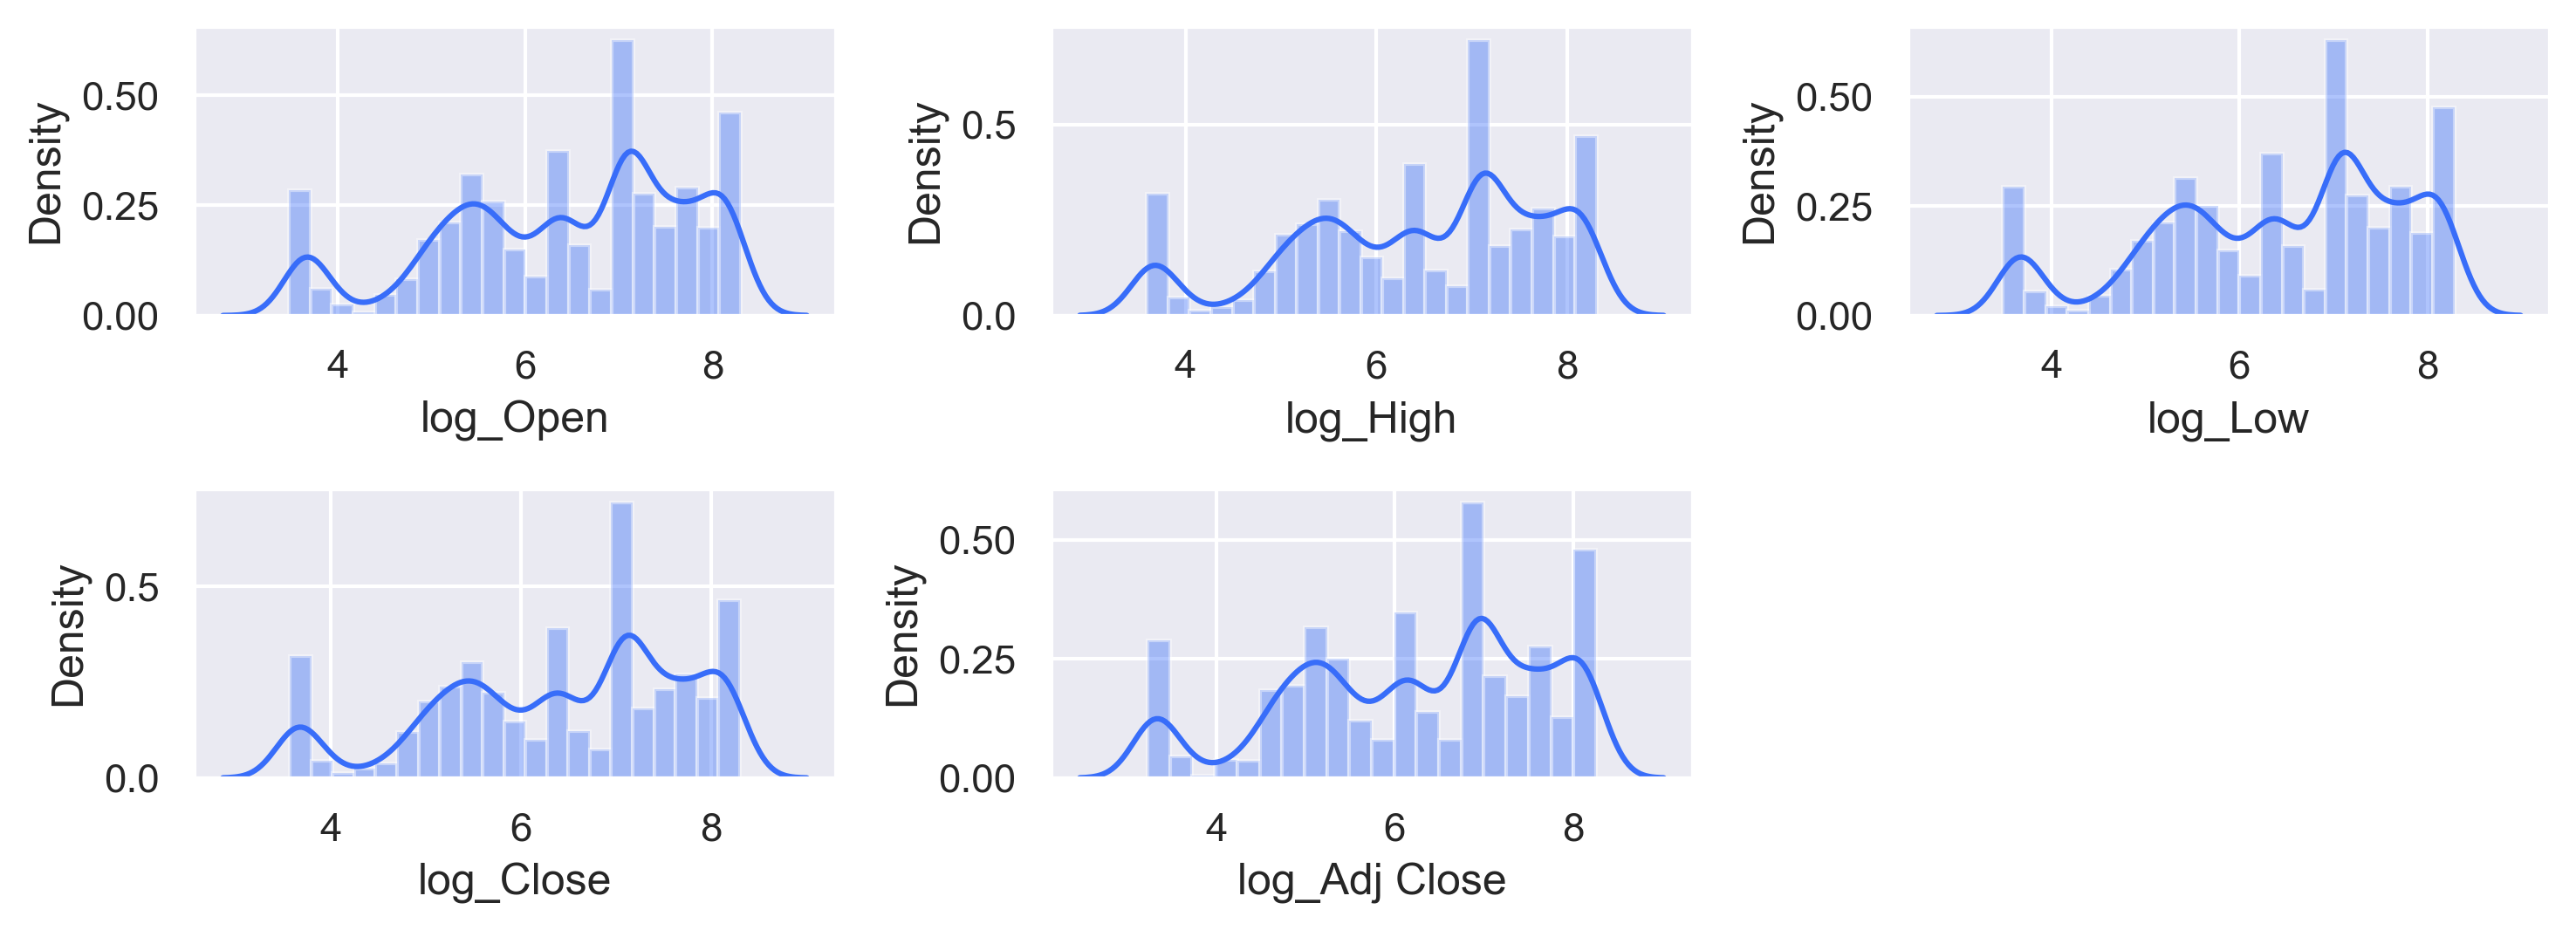

In [17]:
plt.subplot(3,3,1)
sns.distplot(df['log_Open'])

plt.subplot(3,3,2)
sns.distplot(df['log_High'])

plt.subplot(3,3,3)
sns.distplot(df['log_Low'])

plt.subplot(3,3,4)
sns.distplot(df['log_Close'])

plt.subplot(3,3,5)
sns.distplot(df['log_Adj Close'])


plt.tight_layout()

<Axes: xlabel='Date', ylabel='Close'>

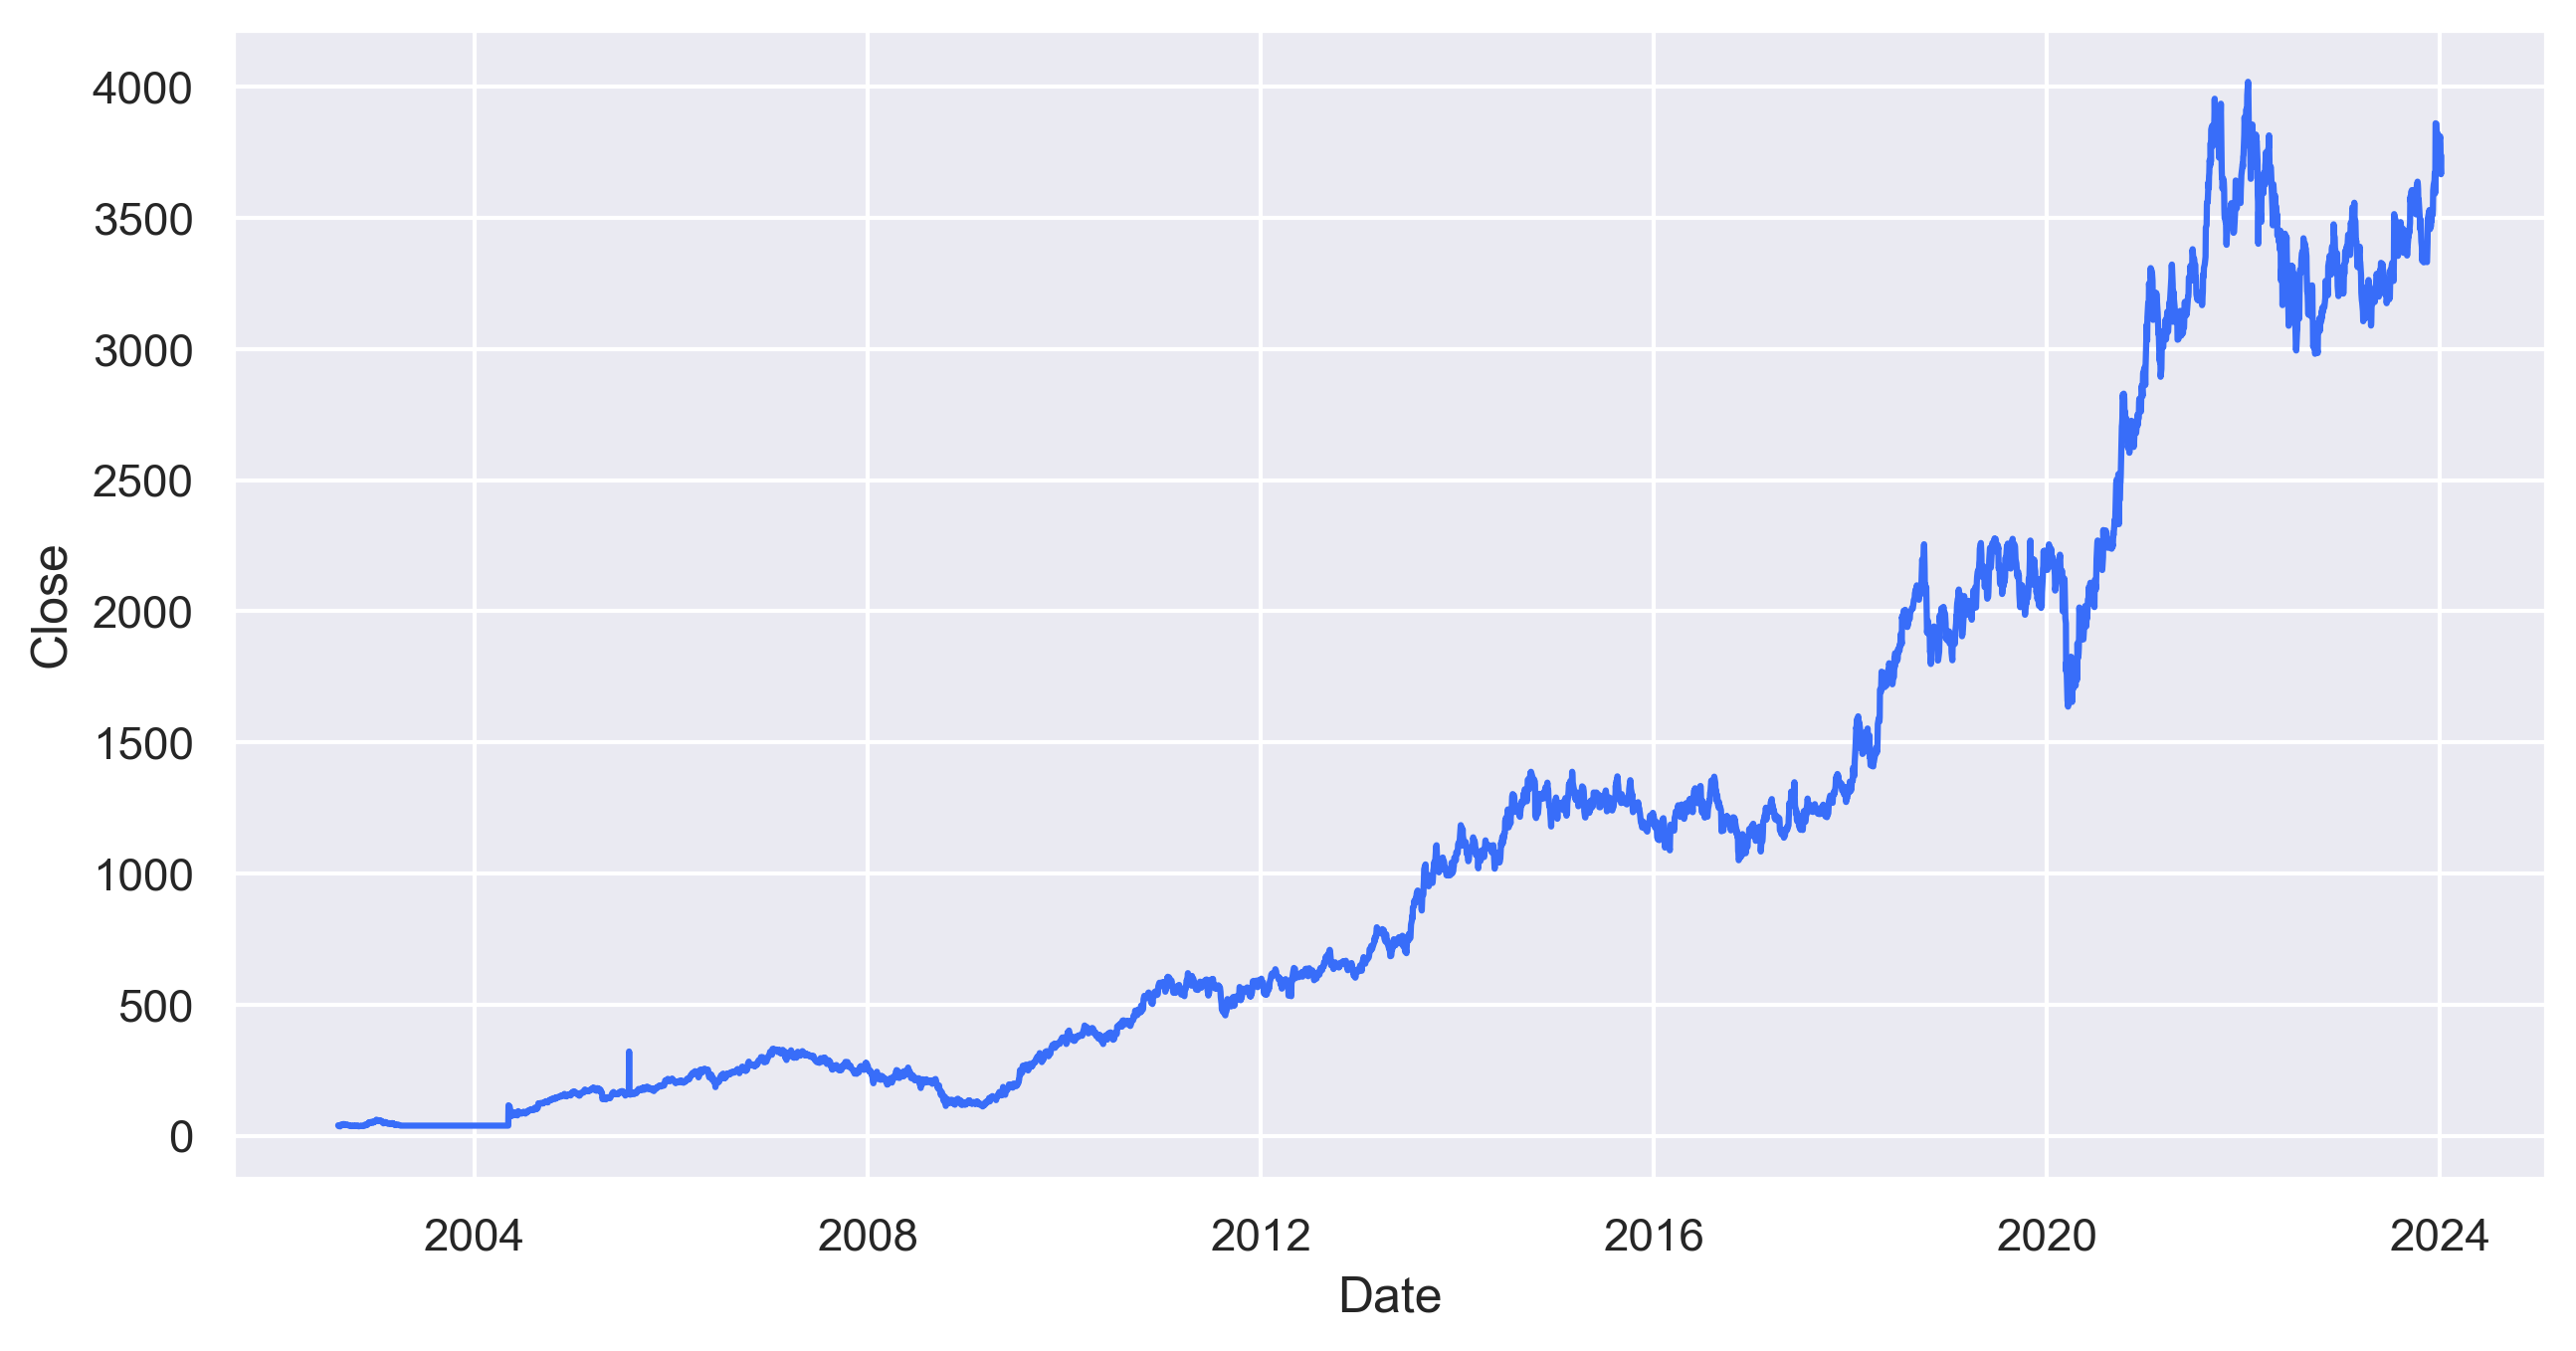

In [18]:
#before data transformation
sns.lineplot(x="Date",y="Close",data=df)

<Axes: xlabel='Date', ylabel='log_Close'>

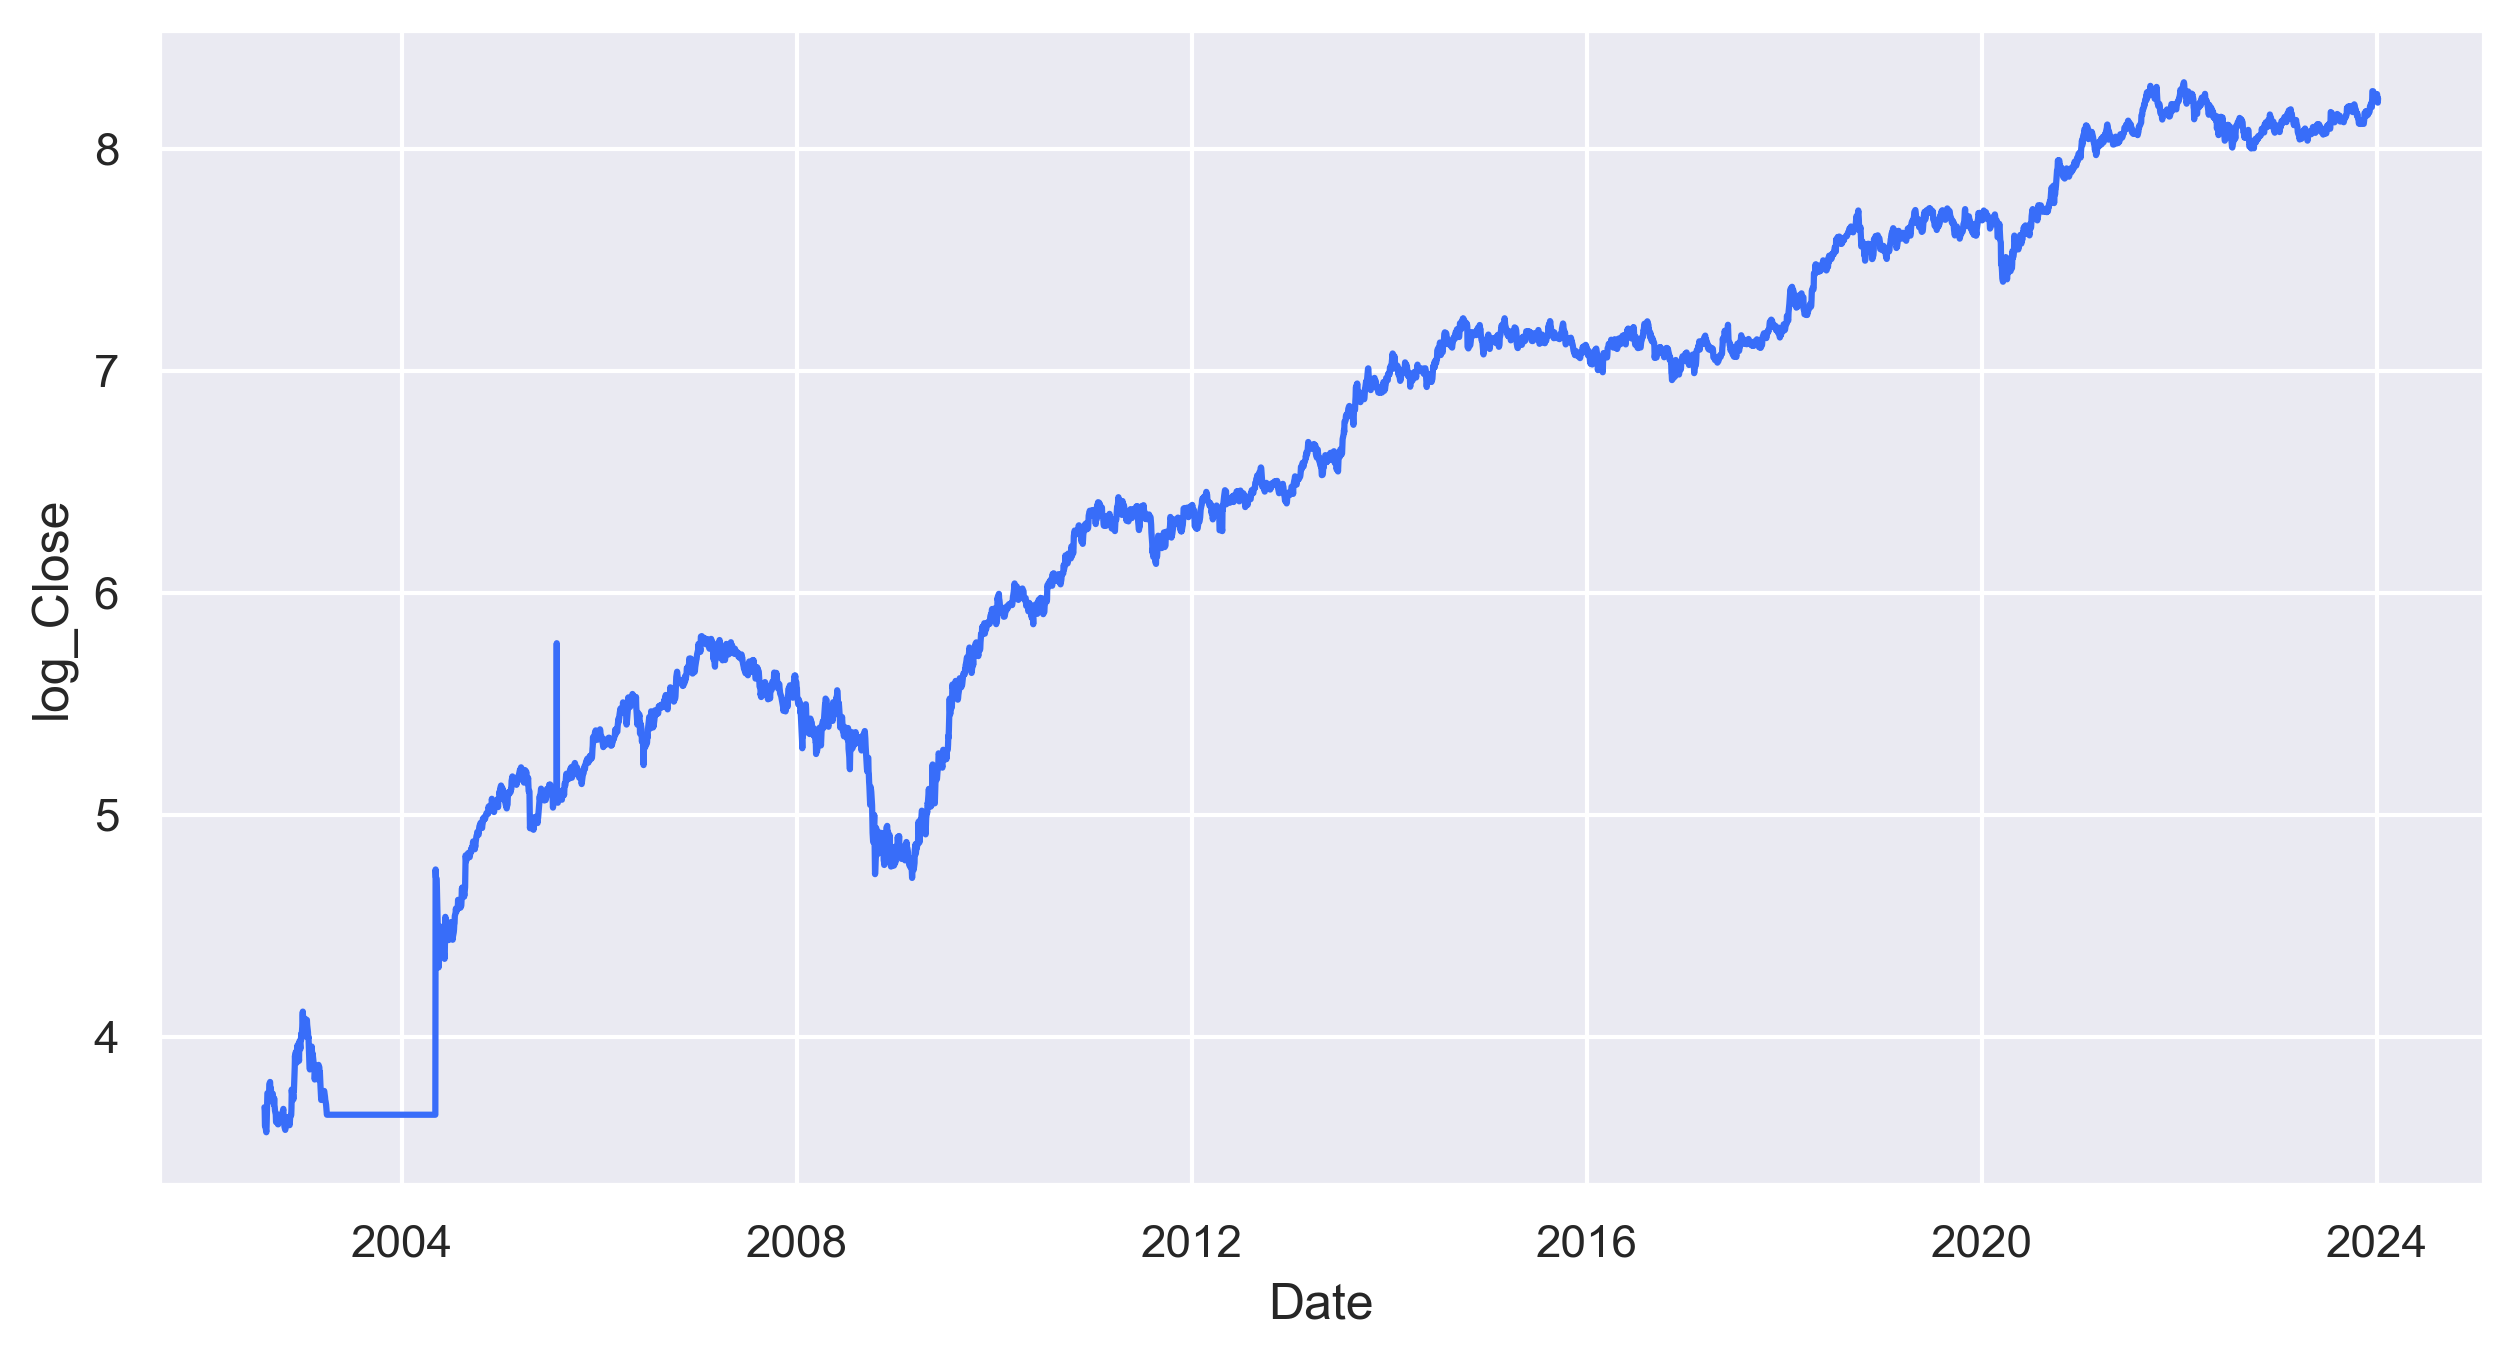

In [19]:
#after data transformation
sns.lineplot(x="Date",y="log_Close",data=df)

In [20]:
#Downsampling from Days to Month
downsampled = df.resample('M').mean()
downsampled

,Open,High,Low,Close,Adj Close,Volume,log_Open,log_High,log_Low,log_Close,log_Adj Close,Open_Squared
Date,,,,,,,,,,,,
2002-08-31,39.313333,40.666667,38.440833,39.341667,27.874712,2.234062e+06,3.670000,3.703379,3.647349,3.670157,3.325592,1.550335e+03
2002-09-30,40.642857,41.494642,39.800595,40.422619,28.640592,6.177890e+05,3.703136,3.723994,3.682474,3.698054,3.353490,1.657443e+03
2002-10-31,38.029348,38.534783,37.143479,37.527174,26.589085,2.235228e+05,3.637653,3.650904,3.614523,3.624826,3.280262,1.448331e+03
2002-11-30,38.987500,39.908928,38.582739,39.098215,27.702213,3.419497e+05,3.661618,3.684198,3.651278,3.664223,3.319659,1.525089e+03
2002-12-31,51.559659,53.473863,50.402273,51.927841,36.792378,2.167789e+06,3.941194,3.978020,3.918565,3.948229,3.603665,2.666521e+03
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,3518.847522,3549.525000,3495.002515,3528.019995,3518.914795,1.922147e+06,8.165641,8.174320,8.158876,8.168270,8.165686,1.238837e+07
2023-10-31,3503.152502,3525.657483,3475.790027,3497.835010,3492.315771,1.990905e+06,8.161059,8.167445,8.153215,8.159525,8.157974,1.228088e+07
2023-11-30,3428.620020,3453.284985,3408.170020,3429.387500,3429.387500,1.810392e+06,8.139731,8.146866,8.133730,8.139905,8.139905,1.175973e+07


<Axes: xlabel='Date'>

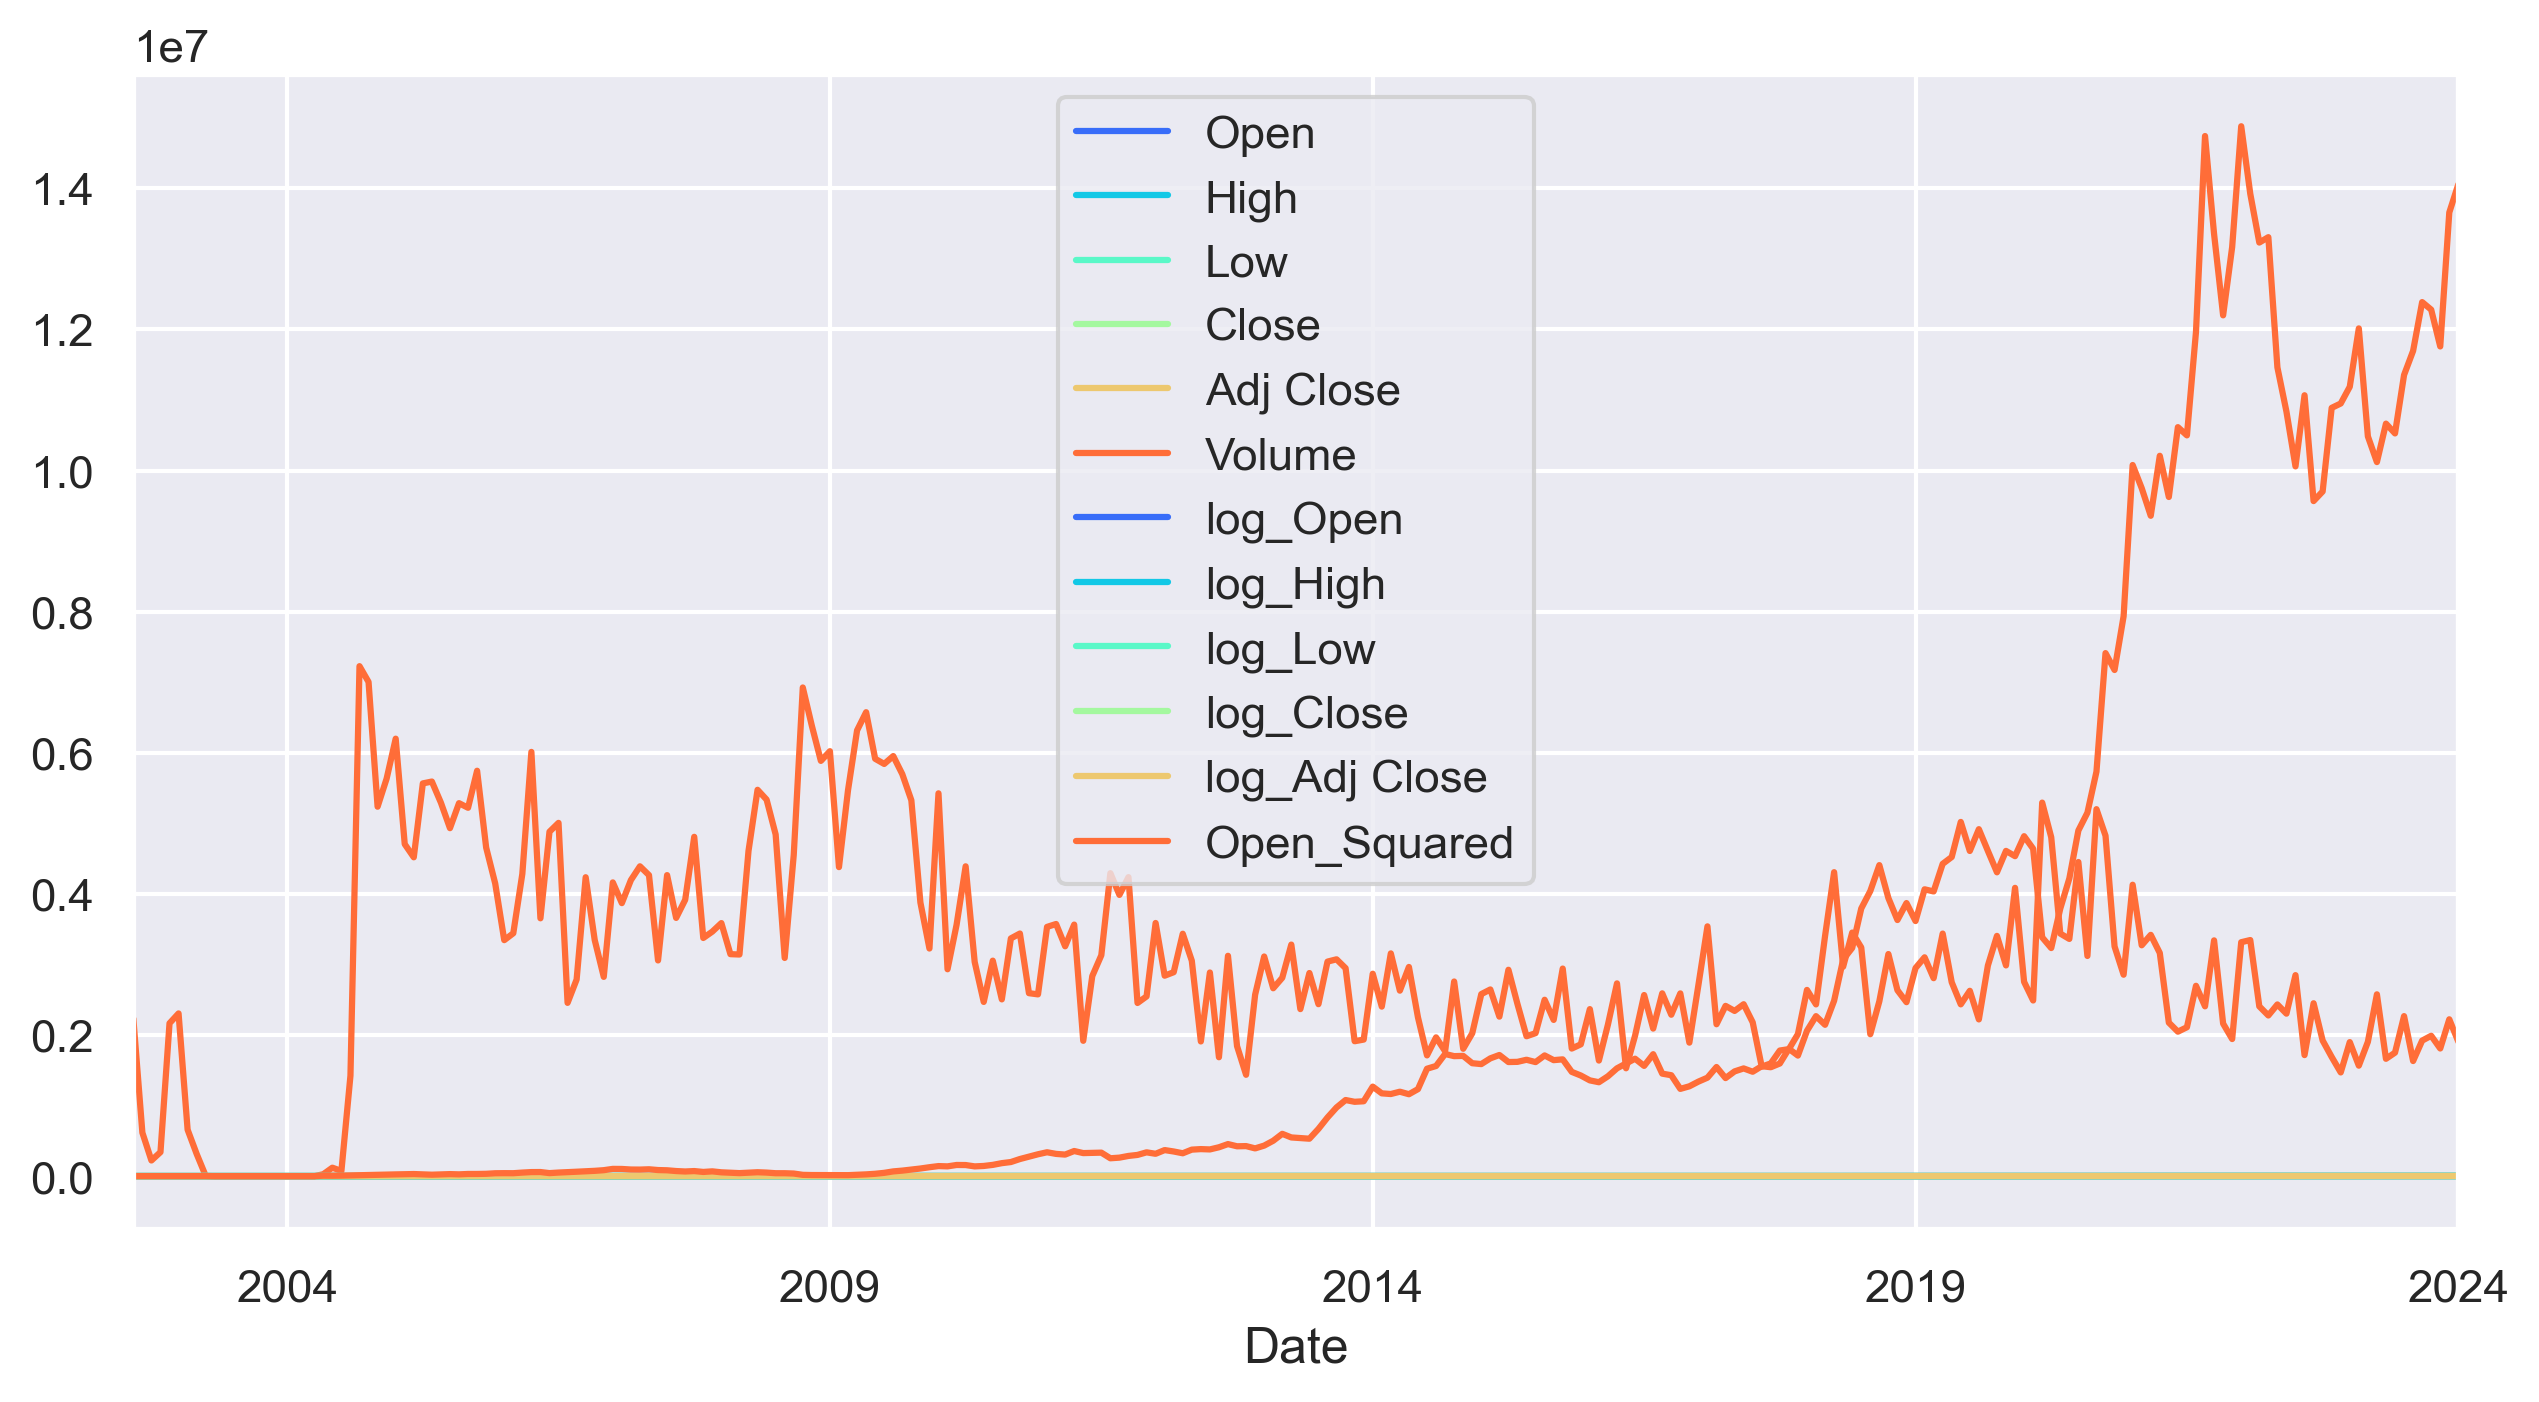

In [21]:
downsampled.plot()

In [22]:
downsampled = downsampled.reset_index()
downsampled["Year"] = downsampled['Date'].dt.strftime("%Y")

In [23]:
downsampled

,Date,Open,High,Low,Close,Adj Close,Volume,log_Open,log_High,log_Low,log_Close,log_Adj Close,Open_Squared,Year
0,2002-08-31,39.313333,40.666667,38.440833,39.341667,27.874712,2.234062e+06,3.670000,3.703379,3.647349,3.670157,3.325592,1.550335e+03,2002
1,2002-09-30,40.642857,41.494642,39.800595,40.422619,28.640592,6.177890e+05,3.703136,3.723994,3.682474,3.698054,3.353490,1.657443e+03,2002
2,2002-10-31,38.029348,38.534783,37.143479,37.527174,26.589085,2.235228e+05,3.637653,3.650904,3.614523,3.624826,3.280262,1.448331e+03,2002
3,2002-11-30,38.987500,39.908928,38.582739,39.098215,27.702213,3.419497e+05,3.661618,3.684198,3.651278,3.664223,3.319659,1.525089e+03,2002
4,2002-12-31,51.559659,53.473863,50.402273,51.927841,36.792378,2.167789e+06,3.941194,3.978020,3.918565,3.948229,3.603665,2.666521e+03,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2023-09-30,3518.847522,3549.525000,3495.002515,3528.019995,3518.914795,1.922147e+06,8.165641,8.174320,8.158876,8.168270,8.165686,1.238837e+07,2023
254,2023-10-31,3503.152502,3525.657483,3475.790027,3497.835010,3492.315771,1.990905e+06,8.161059,8.167445,8.153215,8.159525,8.157974,1.228088e+07,2023
255,2023-11-30,3428.620020,3453.284985,3408.170020,3429.387500,3429.387500,1.810392e+06,8.139731,8.146866,8.133730,8.139905,8.139905,1.175973e+07,2023
256,2023-12-31,3693.840002,3735.742505,3666.037500,3705.259985,3705.259985,2.224265e+06,8.213920,8.225106,8.206399,8.217012,8.217012,1.365812e+07,2023


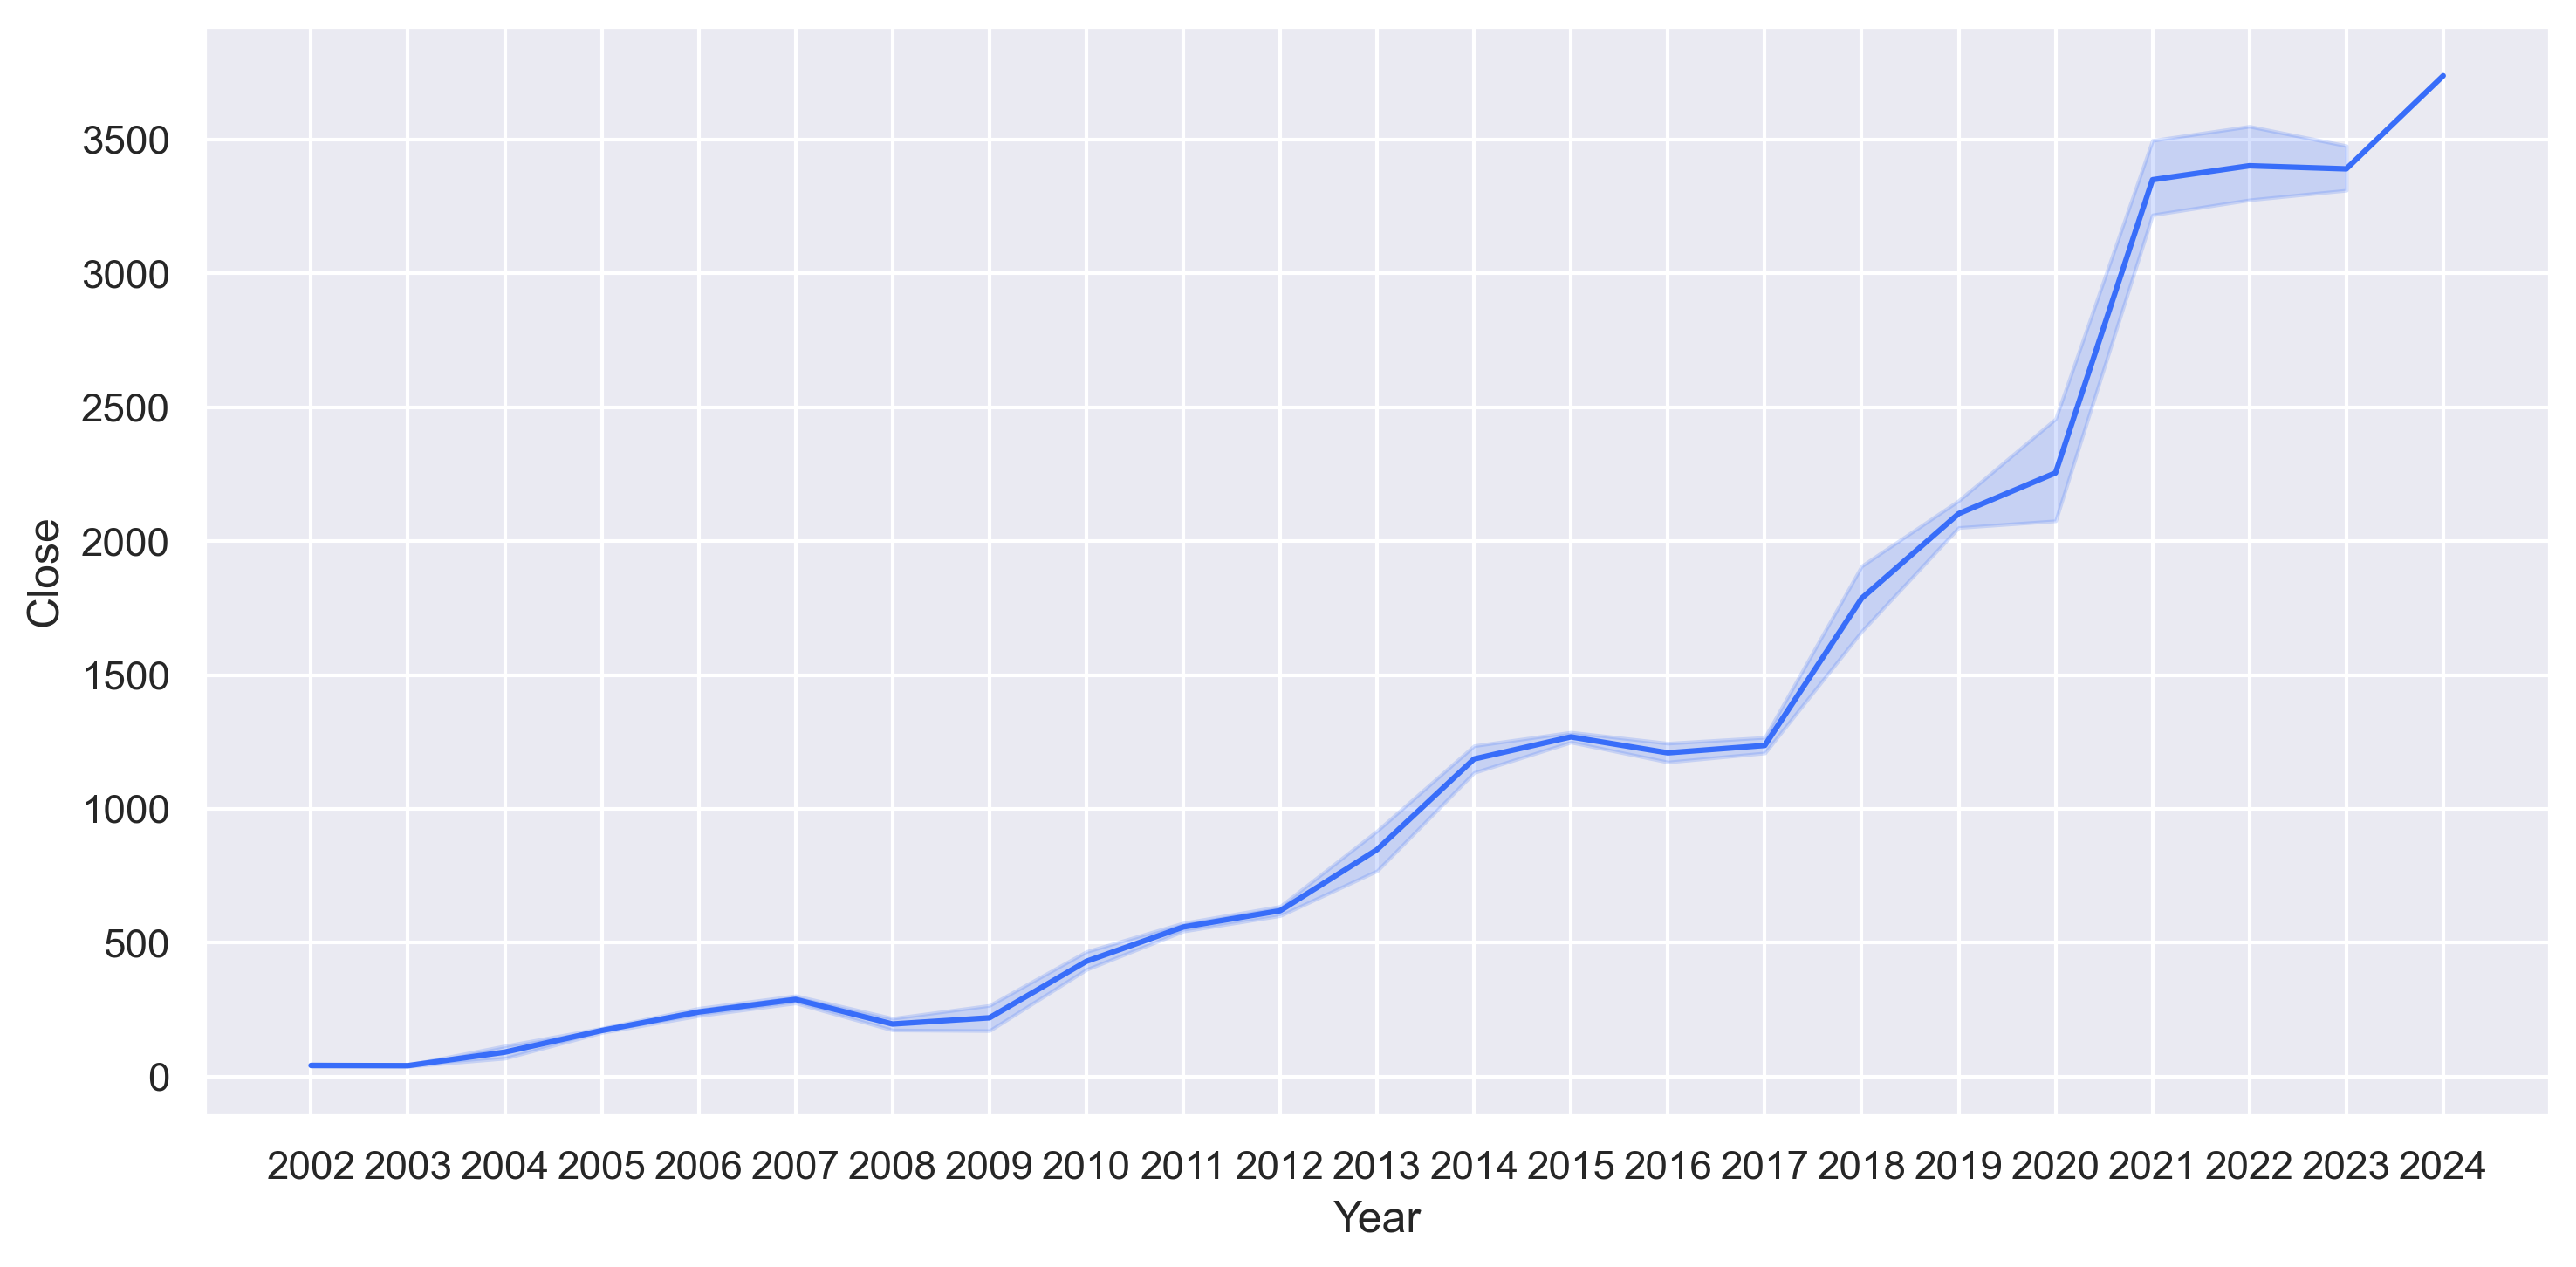

In [24]:
sns.lineplot(x="Year",y="Close",data=downsampled)
plt.tight_layout()

In [25]:
downsampled["Month"] = downsampled['Date'].dt.strftime("%B")
downsampled

,Date,Open,High,Low,Close,Adj Close,Volume,log_Open,log_High,log_Low,log_Close,log_Adj Close,Open_Squared,Year,Month
0,2002-08-31,39.313333,40.666667,38.440833,39.341667,27.874712,2.234062e+06,3.670000,3.703379,3.647349,3.670157,3.325592,1.550335e+03,2002,August
1,2002-09-30,40.642857,41.494642,39.800595,40.422619,28.640592,6.177890e+05,3.703136,3.723994,3.682474,3.698054,3.353490,1.657443e+03,2002,September
2,2002-10-31,38.029348,38.534783,37.143479,37.527174,26.589085,2.235228e+05,3.637653,3.650904,3.614523,3.624826,3.280262,1.448331e+03,2002,October
3,2002-11-30,38.987500,39.908928,38.582739,39.098215,27.702213,3.419497e+05,3.661618,3.684198,3.651278,3.664223,3.319659,1.525089e+03,2002,November
4,2002-12-31,51.559659,53.473863,50.402273,51.927841,36.792378,2.167789e+06,3.941194,3.978020,3.918565,3.948229,3.603665,2.666521e+03,2002,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,2023-09-30,3518.847522,3549.525000,3495.002515,3528.019995,3518.914795,1.922147e+06,8.165641,8.174320,8.158876,8.168270,8.165686,1.238837e+07,2023,September
254,2023-10-31,3503.152502,3525.657483,3475.790027,3497.835010,3492.315771,1.990905e+06,8.161059,8.167445,8.153215,8.159525,8.157974,1.228088e+07,2023,October
255,2023-11-30,3428.620020,3453.284985,3408.170020,3429.387500,3429.387500,1.810392e+06,8.139731,8.146866,8.133730,8.139905,8.139905,1.175973e+07,2023,November
256,2023-12-31,3693.840002,3735.742505,3666.037500,3705.259985,3705.259985,2.224265e+06,8.213920,8.225106,8.206399,8.217012,8.217012,1.365812e+07,2023,December


In [26]:
# One hot encoding for model building 
x=pd.get_dummies(data=downsampled, columns=['Month'])
x.set_index('Date', inplace=True)
x

,Open,High,Low,Close,Adj Close,Volume,log_Open,log_High,log_Low,log_Close,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
Date,,,,,,,,,,,,,,,,,,,,,
2002-08-31,39.313333,40.666667,38.440833,39.341667,27.874712,2.234062e+06,3.670000,3.703379,3.647349,3.670157,...,0,0,0,0,0,0,0,0,0,0
2002-09-30,40.642857,41.494642,39.800595,40.422619,28.640592,6.177890e+05,3.703136,3.723994,3.682474,3.698054,...,0,0,0,0,0,0,0,0,0,1
2002-10-31,38.029348,38.534783,37.143479,37.527174,26.589085,2.235228e+05,3.637653,3.650904,3.614523,3.624826,...,0,0,0,0,0,0,0,0,1,0
2002-11-30,38.987500,39.908928,38.582739,39.098215,27.702213,3.419497e+05,3.661618,3.684198,3.651278,3.664223,...,0,0,0,0,0,0,0,1,0,0
2002-12-31,51.559659,53.473863,50.402273,51.927841,36.792378,2.167789e+06,3.941194,3.978020,3.918565,3.948229,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,3518.847522,3549.525000,3495.002515,3528.019995,3518.914795,1.922147e+06,8.165641,8.174320,8.158876,8.168270,...,0,0,0,0,0,0,0,0,0,1
2023-10-31,3503.152502,3525.657483,3475.790027,3497.835010,3492.315771,1.990905e+06,8.161059,8.167445,8.153215,8.159525,...,0,0,0,0,0,0,0,0,1,0
2023-11-30,3428.620020,3453.284985,3408.170020,3429.387500,3429.387500,1.810392e+06,8.139731,8.146866,8.133730,8.139905,...,0,0,0,0,0,0,0,1,0,0


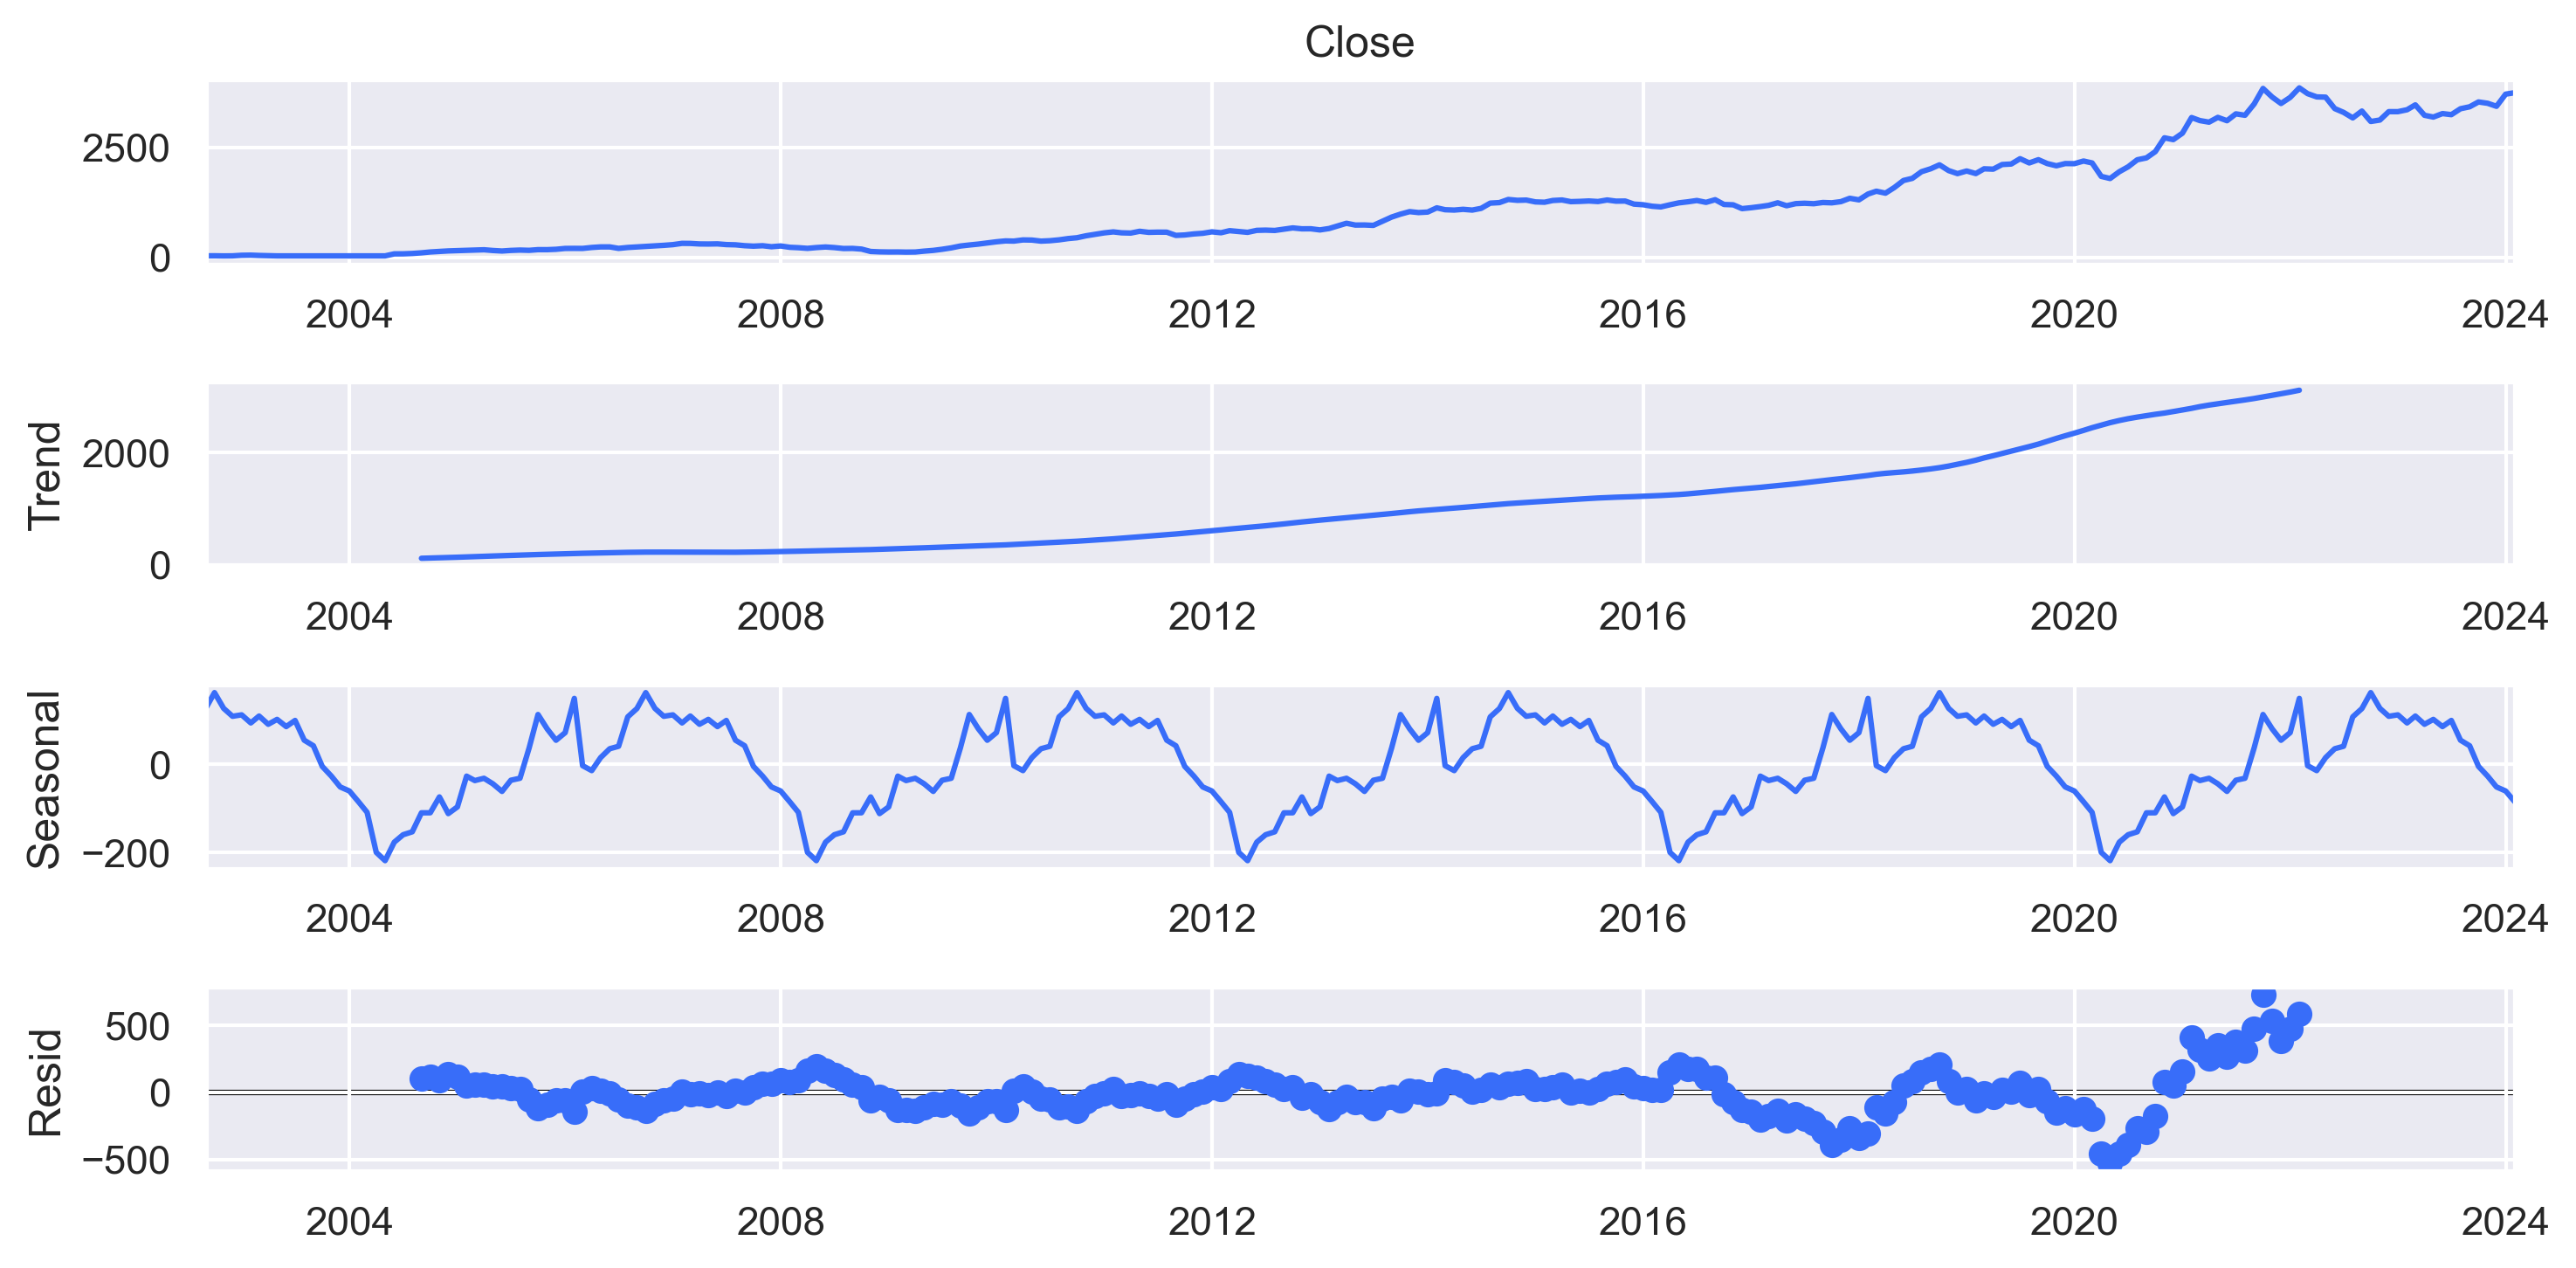

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(x.Close,period =48)
decompose_ts_add.plot()
plt.show()

# Moving Average

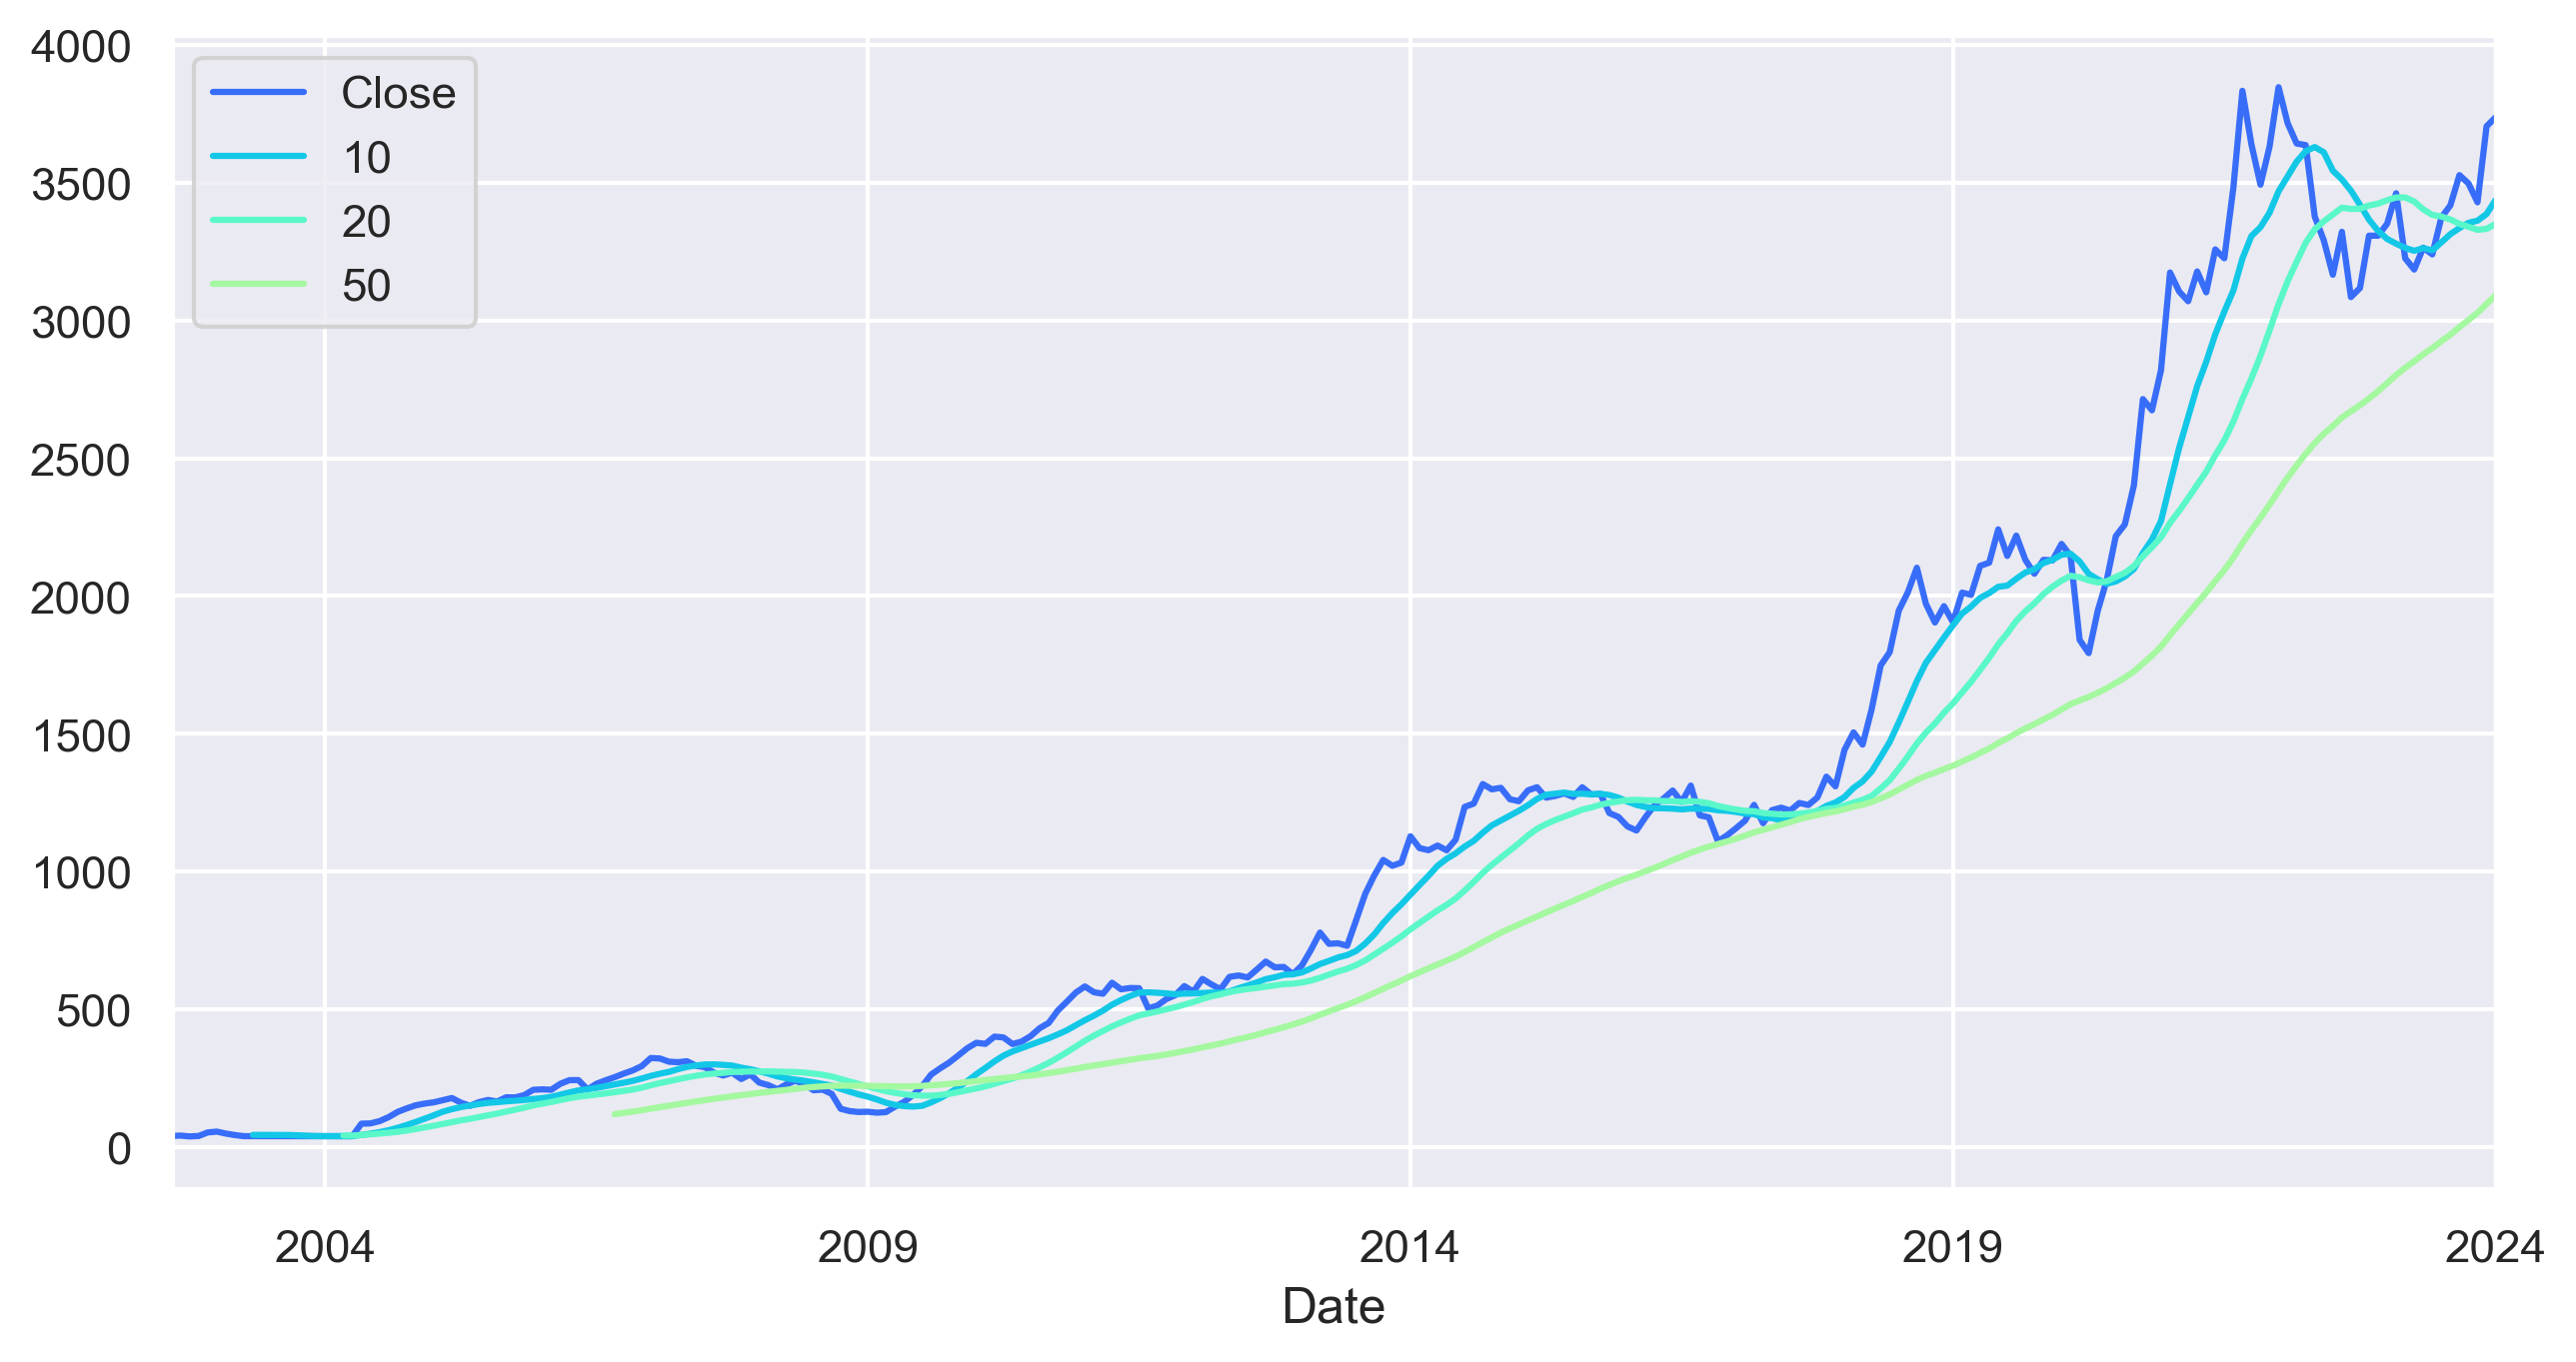

In [28]:
x['Close'].plot()
x['Close'].rolling(10).mean().plot(label = '10')
x['Close'].rolling(20).mean().plot(label = '20')
x['Close'].rolling(50).mean().plot(label = 50)
plt.legend()

# Weighted Moving Average

In [29]:
weights = np.array([0.1, 0.2, 0.3,0.4])
x['WMA'] = x['Close'].rolling(4).apply(lambda x: np.sum(weights*x))
x

,Open,High,Low,Close,Adj Close,Volume,log_Open,log_High,log_Low,log_Close,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,WMA
Date,,,,,,,,,,,,,,,,,,,,,
2002-08-31,39.313333,40.666667,38.440833,39.341667,27.874712,2.234062e+06,3.670000,3.703379,3.647349,3.670157,...,0,0,0,0,0,0,0,0,0,NaN
2002-09-30,40.642857,41.494642,39.800595,40.422619,28.640592,6.177890e+05,3.703136,3.723994,3.682474,3.698054,...,0,0,0,0,0,0,0,0,1,NaN
2002-10-31,38.029348,38.534783,37.143479,37.527174,26.589085,2.235228e+05,3.637653,3.650904,3.614523,3.624826,...,0,0,0,0,0,0,0,1,0,NaN
2002-11-30,38.987500,39.908928,38.582739,39.098215,27.702213,3.419497e+05,3.661618,3.684198,3.651278,3.664223,...,0,0,0,0,0,0,1,0,0,38.916128
2002-12-31,51.559659,53.473863,50.402273,51.927841,36.792378,2.167789e+06,3.941194,3.978020,3.918565,3.948229,...,0,0,0,0,0,0,0,0,0,44.048298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,3518.847522,3549.525000,3495.002515,3528.019995,3518.914795,1.922147e+06,8.165641,8.174320,8.158876,8.168270,...,0,0,0,0,0,0,0,0,1,3435.598948
2023-10-31,3503.152502,3525.657483,3475.790027,3497.835010,3492.315771,1.990905e+06,8.161059,8.167445,8.153215,8.159525,...,0,0,0,0,0,0,0,1,0,3478.653097
2023-11-30,3428.620020,3453.284985,3408.170020,3429.387500,3429.387500,1.810392e+06,8.139731,8.146866,8.133730,8.139905,...,0,0,0,0,0,0,1,0,0,3468.554503


<Axes: xlabel='Date'>

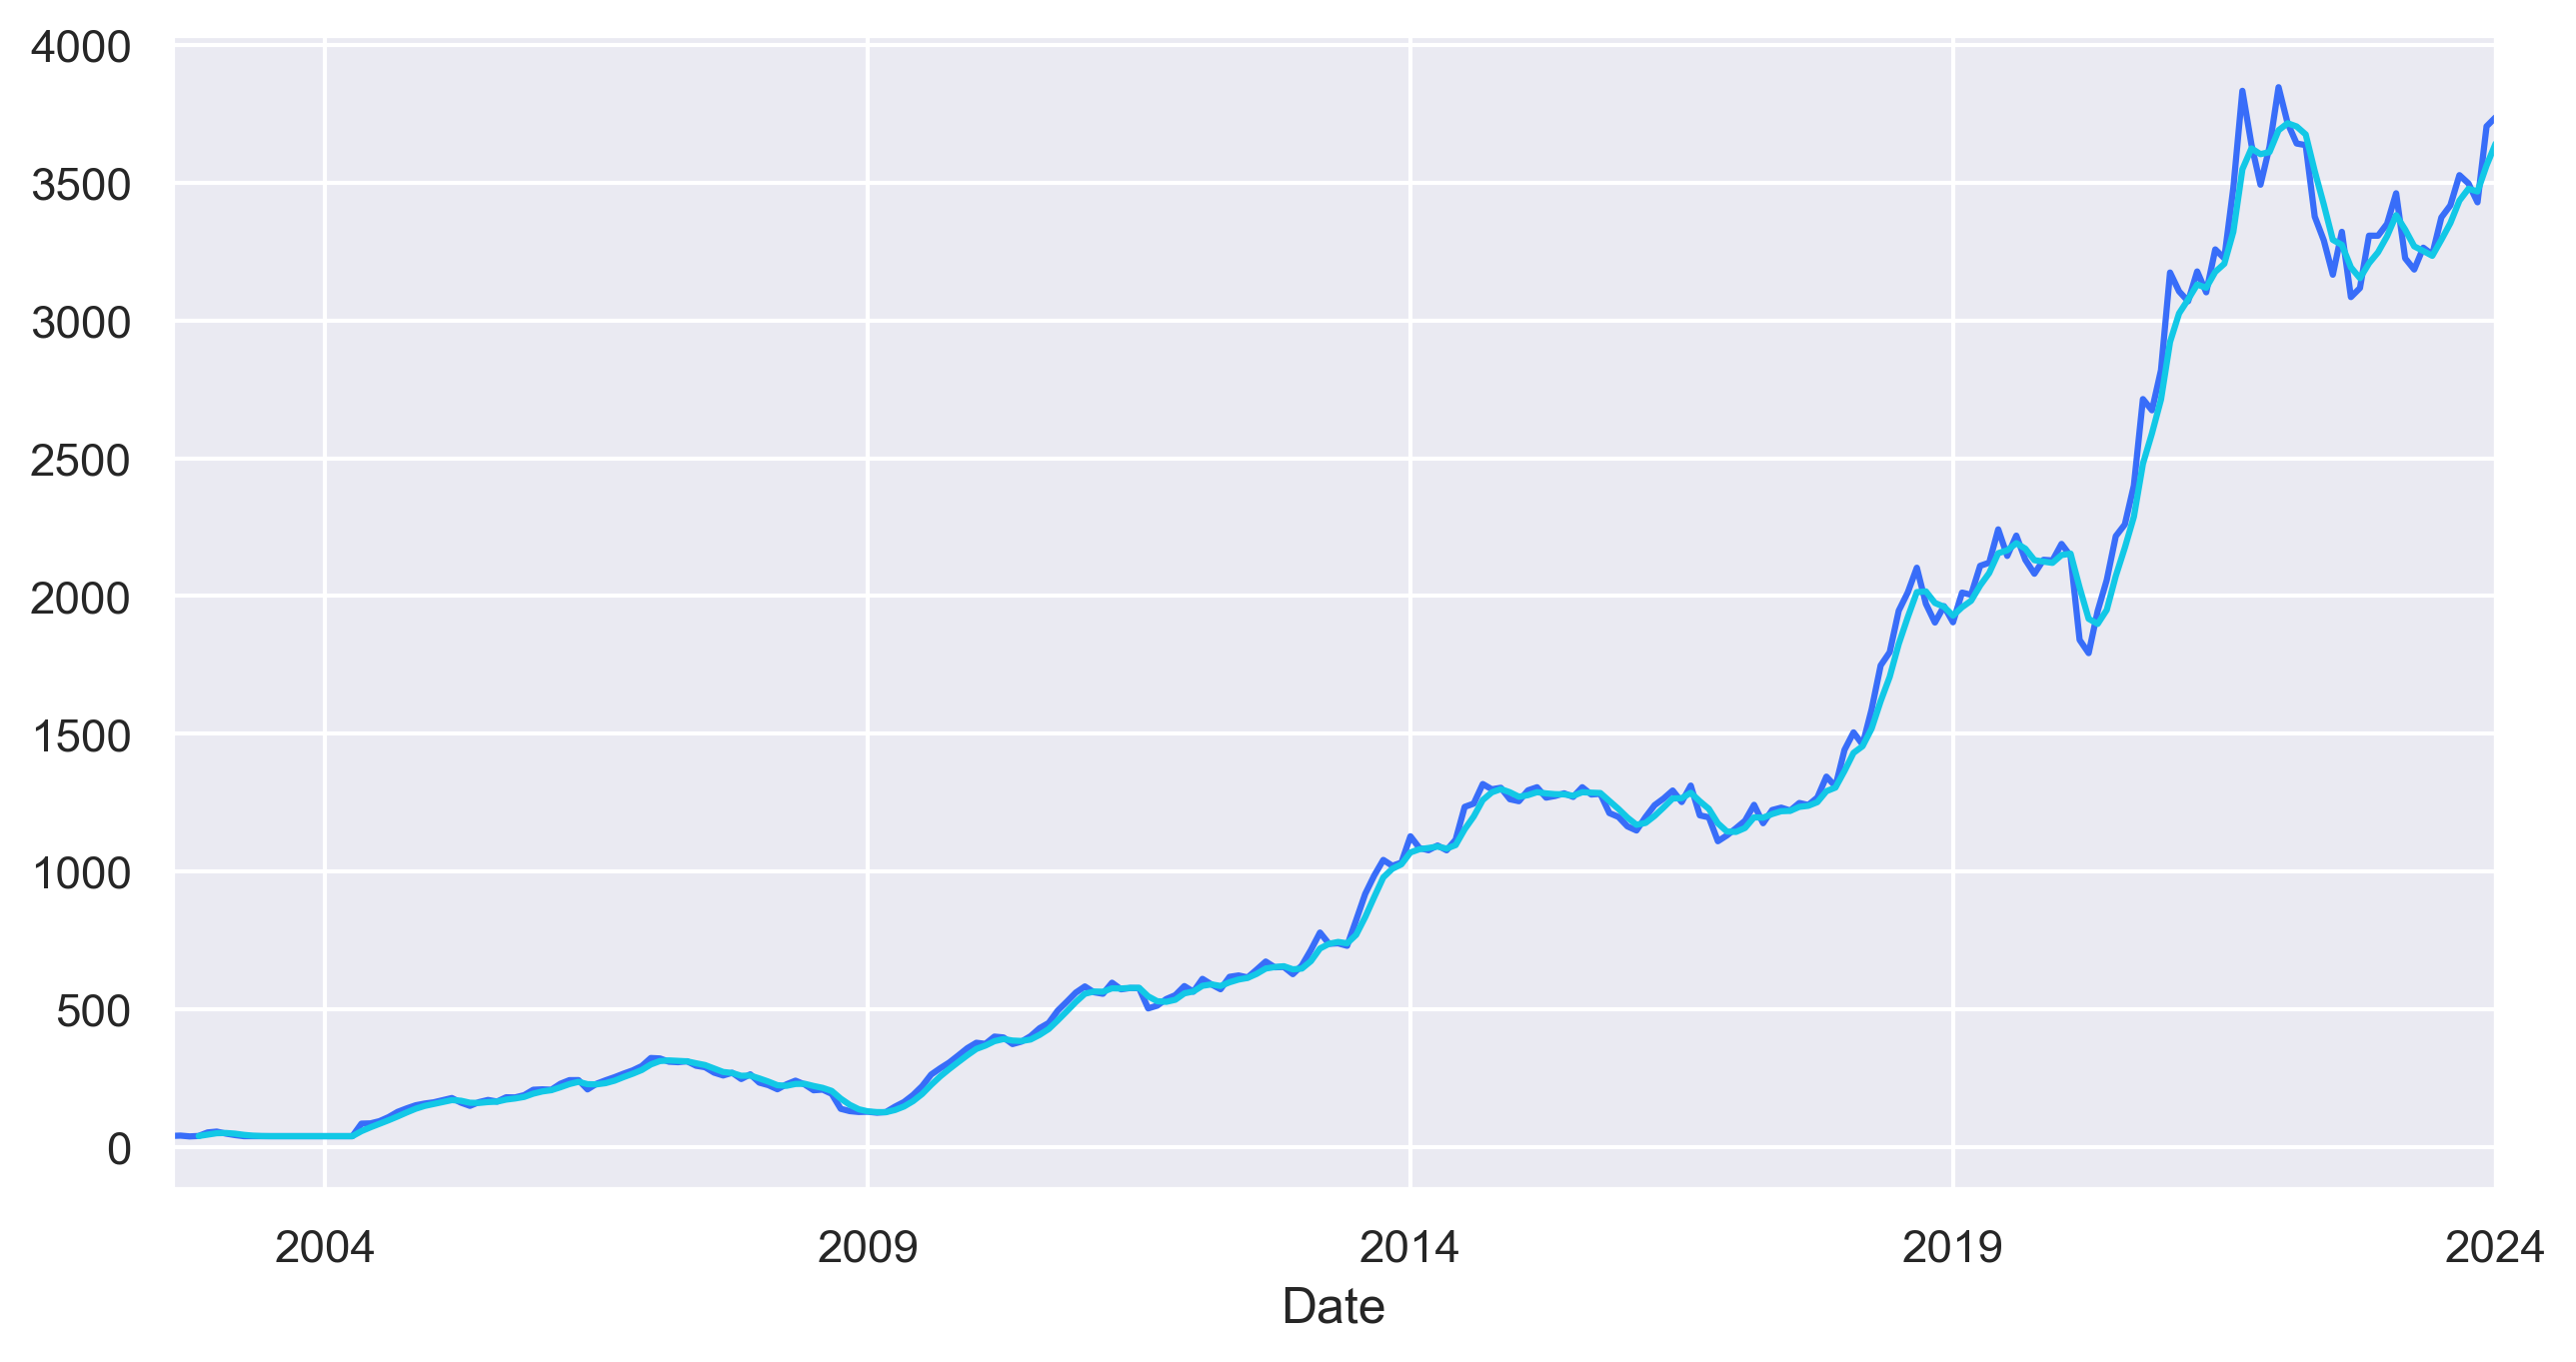

In [30]:
x['Close'].plot()
x['WMA'].plot()

In [31]:
# Splitting the data for training and testing
Train = x.head(206)
Test = x.tail(52)

In [32]:
Test

,Open,High,Low,Close,Adj Close,Volume,log_Open,log_High,log_Low,log_Close,...,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,WMA
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-31,2074.277502,2099.562488,2051.172510,2080.654999,1909.574738,3.406183e+06,7.636810,7.648912,7.625630,7.639809,...,0,0,0,0,0,0,0,1,0,2129.968761
2019-11-30,2146.470007,2159.967493,2115.164990,2131.205023,1974.857916,2.987739e+06,7.671223,7.677506,7.656589,7.664117,...,0,0,0,0,0,0,1,0,0,2124.820260
2019-12-31,2128.611904,2153.280936,2102.397624,2128.897618,1972.719761,4.087018e+06,7.662636,7.674204,7.650134,7.662753,...,0,0,0,0,0,0,0,0,0,2120.171554
2020-01-31,2195.106509,2212.204335,2172.439124,2188.893491,2029.695833,2.755257e+06,7.693914,7.701652,7.683496,7.691013,...,0,1,0,0,0,0,0,0,0,2148.533186
2020-02-29,2154.028937,2175.813130,2126.423687,2145.097380,1992.244937,2.490822e+06,7.674955,7.685003,7.661950,7.670687,...,1,0,0,0,0,0,0,0,0,2153.607025
2020-03-31,1832.102382,1899.461897,1778.350011,1840.485706,1714.436768,5.294988e+06,7.508910,7.546618,7.478619,7.514268,...,0,0,0,0,1,0,0,0,0,2030.391956
2020-04-30,1797.052775,1834.186110,1758.827779,1792.486111,1676.922879,4.803776e+06,7.493253,7.513721,7.471621,7.490295,...,0,0,0,0,0,0,0,0,0,1917.048981
2020-05-31,1947.368421,1972.421046,1916.536840,1945.573686,1820.140837,3.439244e+06,7.574094,7.586875,7.558154,7.573118,...,0,0,0,0,0,1,0,0,0,1898.582187
2020-06-30,2053.913646,2082.384089,2034.947737,2057.656816,1930.144820,3.363279e+06,7.627401,7.641184,7.618141,7.629236,...,0,0,0,1,0,0,0,0,0,1949.280625


# Linear Regression Model


In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Close~Open',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['Open'])))
rmse_linear = np.sqrt(mean_squared_error(Test['Close'], pred_linear))
rmse_linear

8.334165671213011

In [35]:
#Exponential

Exp = smf.ols('log_Close~Open',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['Open'])))
rmse_Exp = np.sqrt(mean_squared_error(Test['Close'], pred_Exp))
rmse_Exp

3099.2130649805104

In [36]:
#Quadratic 

Quad = smf.ols('Close~Open+Open_Squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["Open","Open_Squared"]]))
rmse_Quad = np.sqrt(mean_squared_error(Test['Close'],pred_Quad))
rmse_Quad

9.498803734162859

In [37]:
#Additive seasonality 
add_sea = smf.ols('Close~Month_January+Month_February+Month_March+Month_April+Month_May+Month_June+Month_July+Month_August+Month_September+Month_October+Month_November',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Month_January','Month_February','Month_March','Month_April','Month_May','Month_June','Month_July','Month_August','Month_September','Month_October','Month_November']]))
rmse_add_sea = np.sqrt(mean_squared_error(Test['Close'], pred_add_sea))
rmse_add_sea

2430.8503704026944

In [38]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Close~Open+Open_Squared+Month_January+Month_February+Month_March+Month_April+Month_May+Month_June+Month_July+Month_August+Month_September+Month_October+Month_November',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Month_January','Month_February','Month_March','Month_April','Month_May','Month_June','Month_July','Month_August','Month_September','Month_October','Month_November','Open','Open_Squared']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Close'], pred_add_sea_quad))
rmse_add_sea_quad

9.589518952206415

In [39]:
#Multiplicative Seasonality 

Mul_Add_sea = smf.ols('log_Close~Open+Month_January+Month_February+Month_March+Month_April+Month_May+Month_June+Month_July+Month_August+Month_September+Month_October+Month_November',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(Test['Close'], pred_Mult_add_sea))
rmse_Mult_add_sea 

3099.208024839034

In [40]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,rmse_linear,8.334166
2,rmse_Quad,9.498804
4,rmse_add_sea_quad,9.589519
3,rmse_add_sea,2430.850370
5,rmse_Mult_sea,3099.208025
1,rmse_Exp,3099.213065


# Arima Model

In [41]:
!pip install pmdarima

In [42]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

<Axes: xlabel='Date', ylabel='Close'>

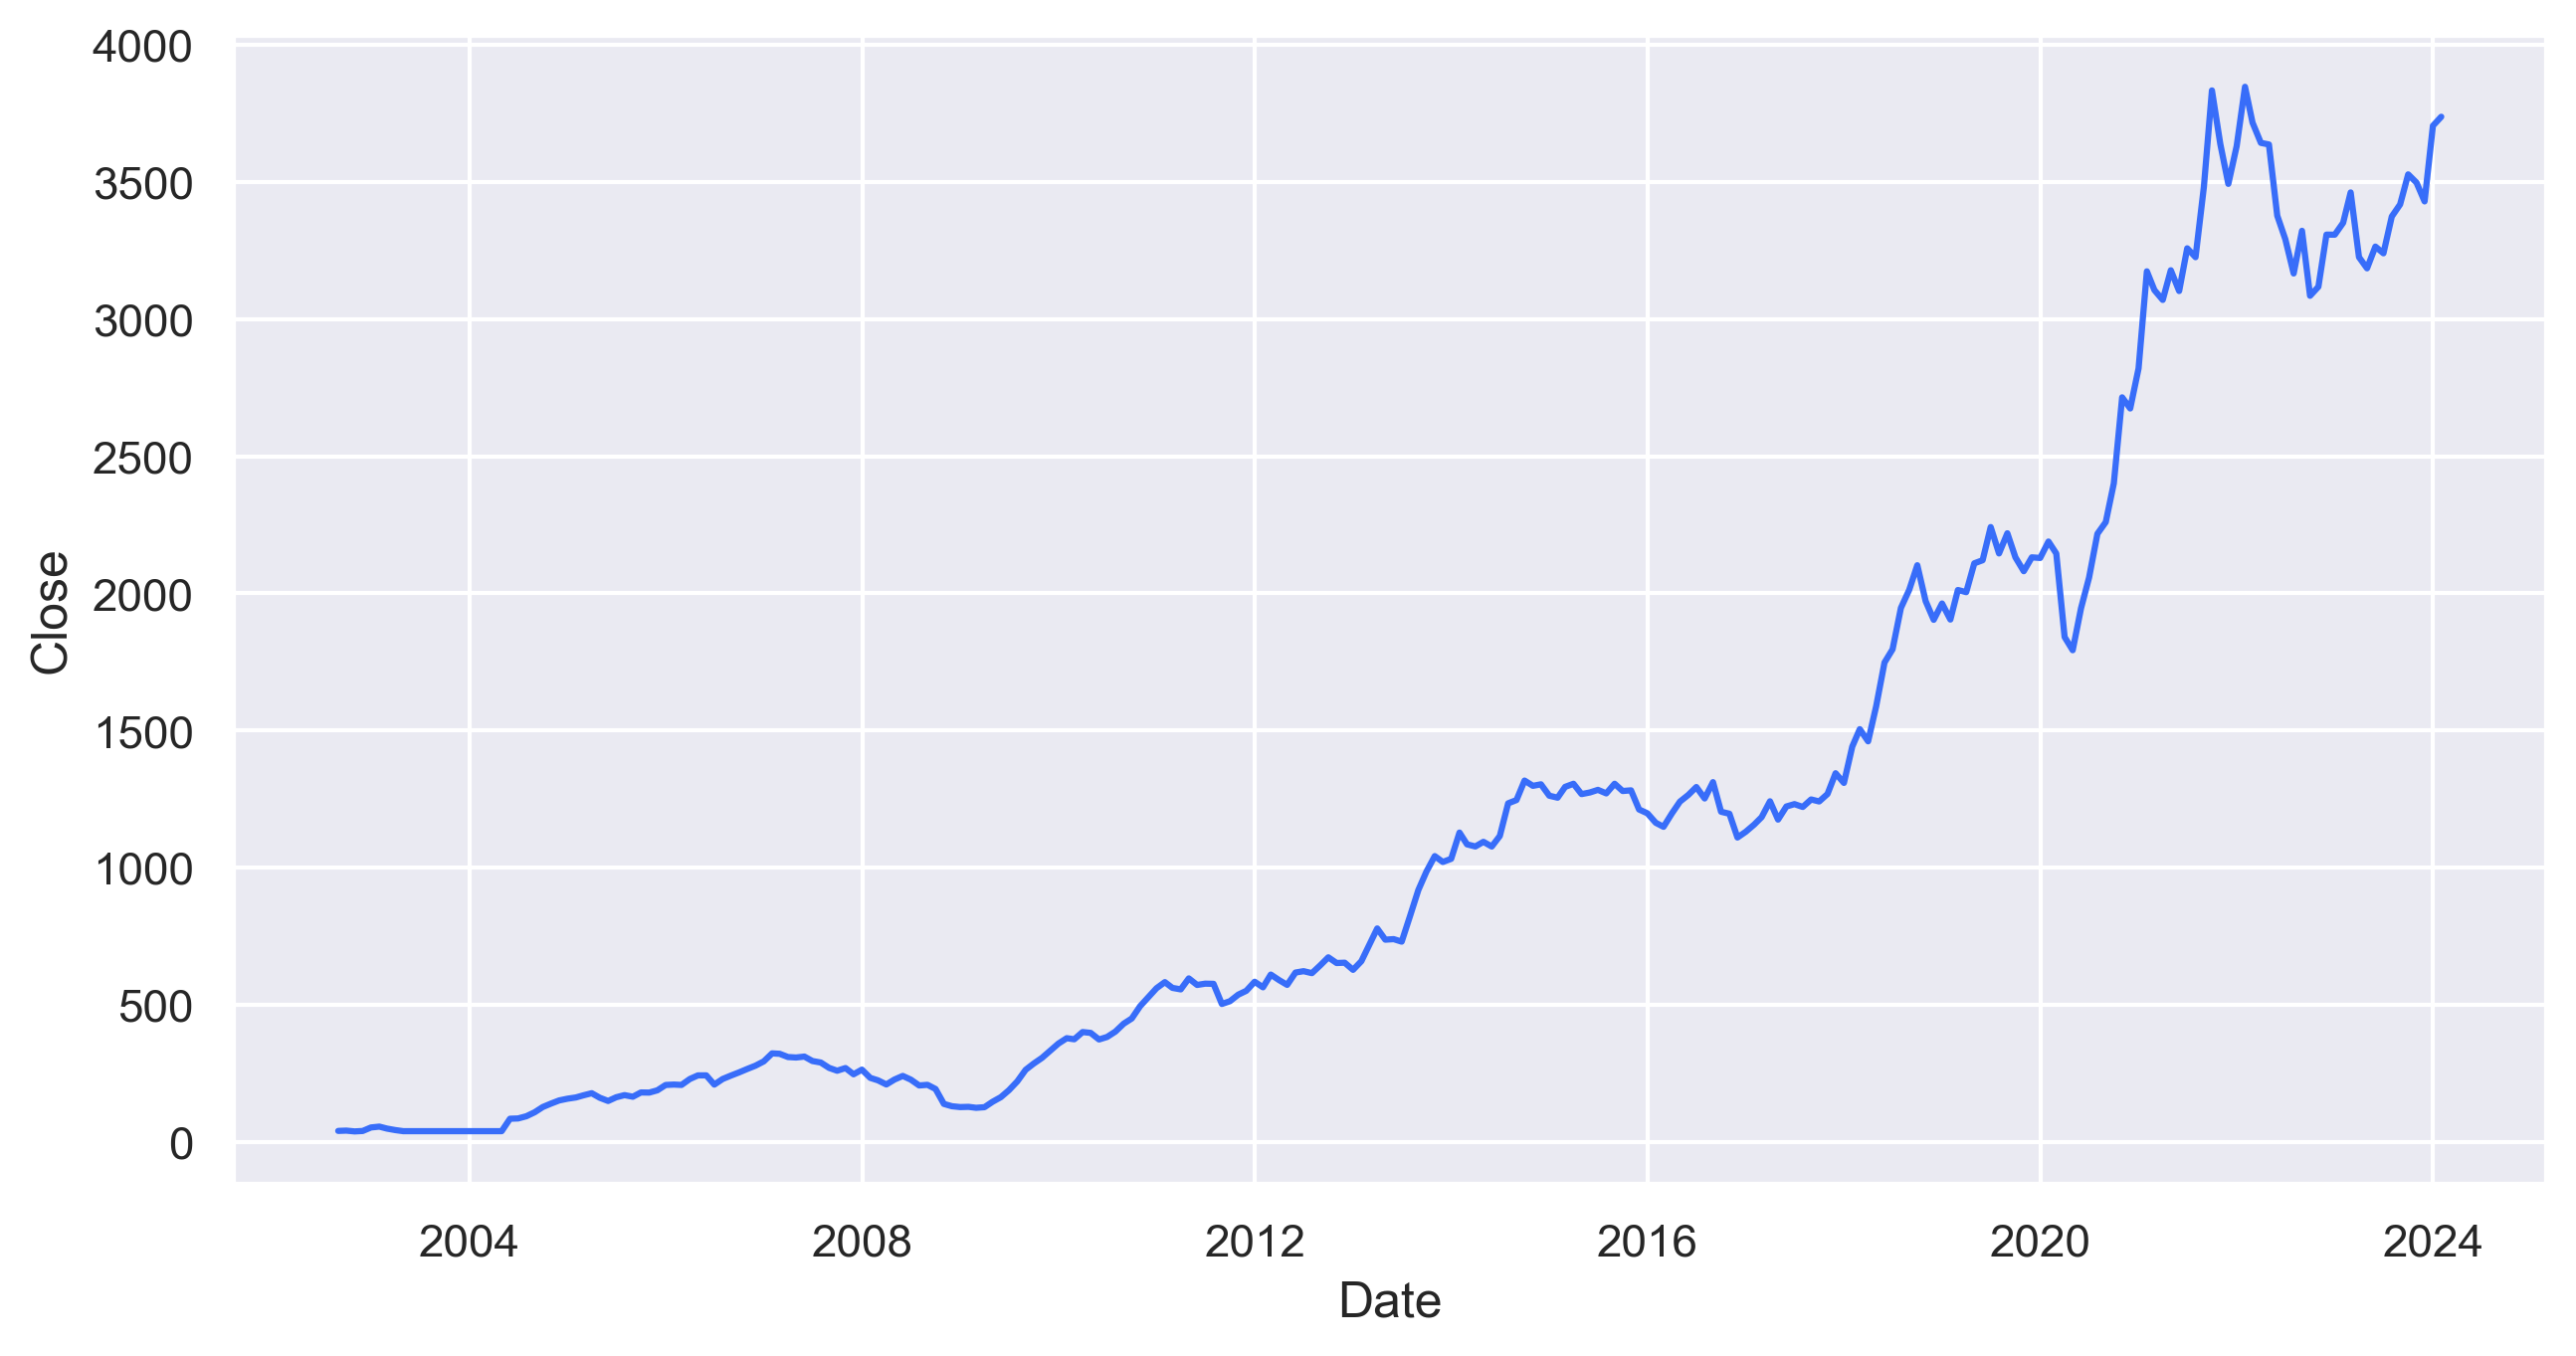

In [43]:
sns.lineplot(x="Date",y="Close",data=x)

In [44]:
adfuller(x['Close'])[1]

0.9905758741418644

# 
Null hypothesis: Data is Non stationary

Alternate Hypothesis: Data is Stationary

If p< 0.05 ; Data is stationary

if p>0.05; Data is not stationary

In [45]:
# For getting the (p,d,q)
order = auto_arima(x['Close'])
order

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True)

In [46]:
x['First-Order']=x['Close'].diff(periods=1)
x

,Open,High,Low,Close,Adj Close,Volume,log_Open,log_High,log_Low,log_Close,...,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,WMA,First-Order
Date,,,,,,,,,,,,,,,,,,,,,
2002-08-31,39.313333,40.666667,38.440833,39.341667,27.874712,2.234062e+06,3.670000,3.703379,3.647349,3.670157,...,0,0,0,0,0,0,0,0,NaN,NaN
2002-09-30,40.642857,41.494642,39.800595,40.422619,28.640592,6.177890e+05,3.703136,3.723994,3.682474,3.698054,...,0,0,0,0,0,0,0,1,NaN,1.080952
2002-10-31,38.029348,38.534783,37.143479,37.527174,26.589085,2.235228e+05,3.637653,3.650904,3.614523,3.624826,...,0,0,0,0,0,0,1,0,NaN,-2.895445
2002-11-30,38.987500,39.908928,38.582739,39.098215,27.702213,3.419497e+05,3.661618,3.684198,3.651278,3.664223,...,0,0,0,0,0,1,0,0,38.916128,1.571041
2002-12-31,51.559659,53.473863,50.402273,51.927841,36.792378,2.167789e+06,3.941194,3.978020,3.918565,3.948229,...,0,0,0,0,0,0,0,0,44.048298,12.829627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30,3518.847522,3549.525000,3495.002515,3528.019995,3518.914795,1.922147e+06,8.165641,8.174320,8.158876,8.168270,...,0,0,0,0,0,0,0,1,3435.598948,109.569988
2023-10-31,3503.152502,3525.657483,3475.790027,3497.835010,3492.315771,1.990905e+06,8.161059,8.167445,8.153215,8.159525,...,0,0,0,0,0,0,1,0,3478.653097,-30.184985
2023-11-30,3428.620020,3453.284985,3408.170020,3429.387500,3429.387500,1.810392e+06,8.139731,8.146866,8.133730,8.139905,...,0,0,0,0,0,1,0,0,3468.554503,-68.447510


<Axes: xlabel='Date', ylabel='Close'>

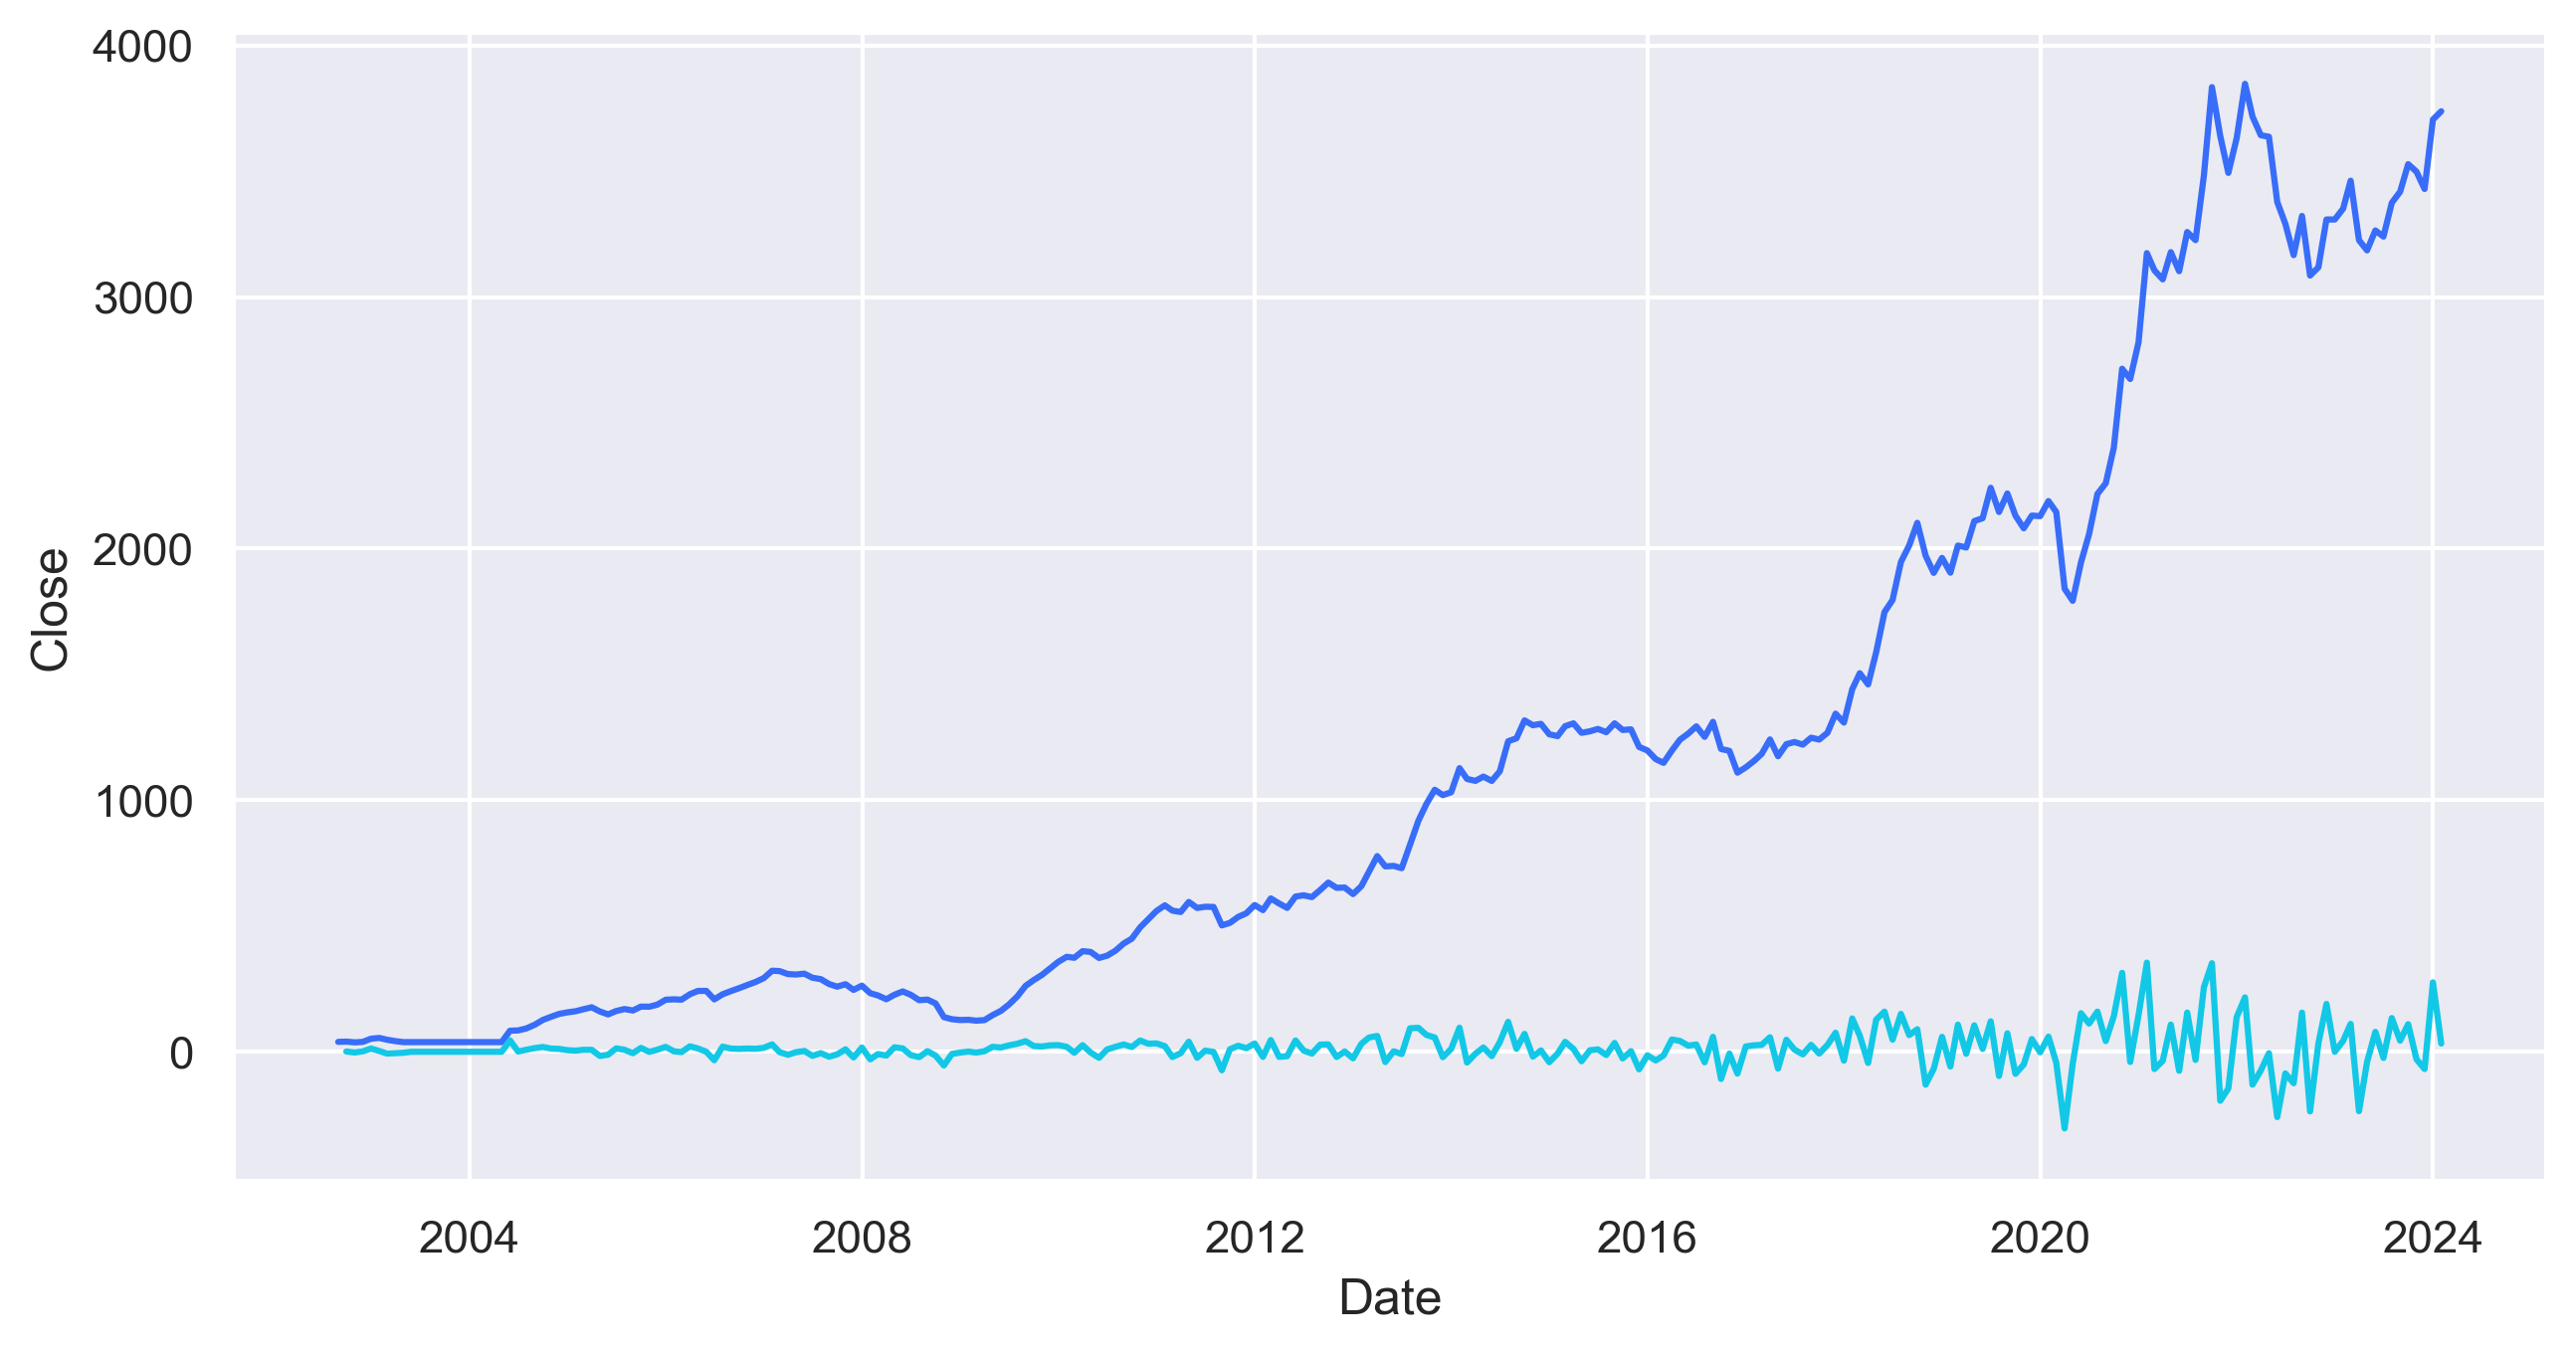

In [47]:
sns.lineplot(x="Date",y="Close",data=x)
sns.lineplot(x="Date",y="First-Order",data=x)

In [48]:
x.shape

(258, 27)

In [49]:
# Splitting the data for training and testing
train = x.iloc[:-30]
test = x.iloc[-30:]

In [50]:
train.shape

(228, 27)

In [51]:
test.shape

(30, 27)

In [52]:
model = ARIMA(train['First-Order'], order=(2, 1, 2)).fit()


C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\shubh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [53]:
test

,Open,High,Low,Close,Adj Close,Volume,log_Open,log_High,log_Low,log_Close,...,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September,WMA,First-Order
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-31,3454.864293,3503.752395,3438.111909,3482.064255,3318.037214,2.698955e+06,8.146331,8.160306,8.141510,8.154151,...,0,0,0,0,0,0,0,0,3322.553088,256.066615
2021-09-30,3839.130952,3875.592843,3796.678571,3834.135696,3653.523891,2.407886e+06,8.252911,8.262364,8.241798,8.251610,...,0,0,0,0,0,0,0,1,3549.307630,352.071440
2021-10-31,3651.732507,3683.279993,3612.152502,3639.377490,3471.488647,3.342541e+06,8.202285,8.210807,8.191331,8.198714,...,0,0,0,0,0,0,1,0,3625.004320,-194.758205
2021-11-30,3492.724975,3522.277515,3463.817493,3493.282471,3335.114148,2.163394e+06,8.158376,8.166826,8.150059,8.158554,...,0,0,0,0,0,1,0,0,3604.159800,-146.095020
2021-12-31,3628.484778,3659.452170,3600.410878,3631.141304,3466.730883,1.944542e+06,8.196476,8.204994,8.188673,8.197190,...,0,0,0,0,0,0,0,0,3611.730331,137.858834
2022-01-31,3856.205005,3888.477478,3804.890002,3847.367480,3675.699414,3.316602e+06,8.257106,8.265498,8.243764,8.254855,...,1,0,0,0,0,0,0,0,3690.883627,216.226176
2022-02-28,3729.502502,3758.022498,3686.707495,3716.679980,3554.631799,3.347300e+06,8.223493,8.231168,8.211907,8.220043,...,0,0,0,0,0,0,0,0,3716.438744,-130.687500
2022-03-31,3636.516671,3673.907145,3606.530959,3642.852353,3484.023089,2.407593e+06,8.198483,8.208843,8.190244,8.200314,...,0,0,0,1,0,0,0,0,3704.732562,-73.827627
2022-04-30,3646.950003,3672.173687,3603.305279,3637.007890,3478.433401,2.278701e+06,8.201342,8.208263,8.189254,8.198581,...,0,0,0,0,0,0,0,0,3675.731606,-5.844463


In [54]:
ypred = model.predict(start =228, end = 257)
ypred

2021-08-31    23.295135
2021-09-30    52.061358
2021-10-31    31.212059
2021-11-30    44.992691
2021-12-31    35.919547
2022-01-31    41.892260
2022-02-28    37.960544
2022-03-31    40.548712
2022-04-30    38.844974
2022-05-31    39.966510
2022-06-30    39.228226
2022-07-31    39.714223
2022-08-31    39.394301
2022-09-30    39.604899
2022-10-31    39.466266
2022-11-30    39.557525
2022-12-31    39.497451
2023-01-31    39.536997
2023-02-28    39.510965
2023-03-31    39.528101
2023-04-30    39.516821
2023-05-31    39.524246
2023-06-30    39.519358
2023-07-31    39.522576
2023-08-31    39.520458
2023-09-30    39.521852
2023-10-31    39.520934
2023-11-30    39.521539
2023-12-31    39.521141
2024-01-31    39.521403
Freq: M, Name: predicted_mean, dtype: float64

In [55]:
print(np.sqrt(mean_squared_error(test['First-Order'], ypred)))

157.30522882575556


# Sarima Model

In [56]:
import statsmodels.api as sm

In [57]:
train_sample = x["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(2,1,2),trend='c')
result = model.fit(maxiter=257,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=128)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  257
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -1474.638
Date:                Mon, 22 Jan 2024   AIC                           2961.276
Time:                        10:15:33   BIC                           2982.547
Sample:                             0   HQIC                          2969.831
                                - 257                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2272      0.088      2.567      0.010       0.054       0.401
ar.L1         -0.6582      0.158     -4.153      0.000      -0.969      -0.348
ar.L2         -0.1038      0.053     -1.972      0.0

In [58]:
import math
rmse = math.sqrt(mean_squared_error(train_sample[1:130], predicted_result))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 21.37487123929234.


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
X = x[['Open', 'High', 'Low']]  # Features
y = x['Close']  # Target variable

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
model = LinearRegression()


In [63]:
model.fit(X_train, y_train)

LinearRegression()

In [64]:
y_pred = model.predict(X_test)


In [65]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 1.9734792565758776
R-squared (R2) Score: 0.9999982267428794


In [66]:
import pickle

pickle.dump(model, open('model.pkl','wb'))